# Exploring Algorithmic Solutions to Sudoku: An Analysis of Different Techniques

This project explore the application of three distinct algorithms: Backtracking, Dancing Links, and Simulated Annealing, in solving Sudoku puzzles. It includes Python implementations of each algorithm and provides simulations to demonstrate their functionality. The project examines the strengths and weaknesses of these approaches through comparative analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics 
import seaborn as sns
import time

### Examples


#### ⚠️ Attention: Importing a Sudoku Puzzle Dataset

When importing the Sudoku puzzle dataset from [Sheng-Wei, 2024], please follow these instructions:

- **Local Import:** If you are importing the dataset from the same directory on your computer, use the Local Import Cell.

- **Colab Import:** If you are working in Google Colab and need to import the dataset, Colab Import cell.

⚠️ Attention: If you copy the folder in your google drive you don't have to change the data_path otherwise check the correct data_path.


**Colab Import:**

In [2]:
# import csv
# from google.colab import drive
# drive.mount('/content/drive')
# data_path = '/content/drive/MyDrive/Exploring_Algorithmic_Solutions_to_Sudoku_Stefano_Sperti/data/20240415.csv'
#Sudoku_dataset  = pd.read_csv(data_path)

**Local Import:**

In [3]:
data_path = 'data/20240415.csv'
Sudoku_dataset = pd.read_csv(data_path)

Examples of sudoku used for evaluate our algorithm

In [4]:
# Easy 9x9 sudoku
grid_9_1 = [[7, 9, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 5, 6, 0, 0, 0, 0],
        [3, 0, 0, 0, 0, 0, 0, 1, 2],
        [0, 0, 0, 0, 0, 2, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 6],
        [0, 0, 7, 0, 0, 0, 5, 0, 8],
        [0, 2, 6, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 4, 0, 0, 9, 0, 0],
        [0, 0, 0, 0, 2, 1, 0, 3, 0]]

# hard 9x9 sudoku
grid_9_2 =[[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 5, 6, 0, 0, 0, 0],
        [3, 0, 0, 0, 0, 0, 0, 1, 2],
        [0, 0, 0, 0, 0, 2, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 6],
        [0, 0, 7, 0, 0, 0, 5, 0, 8],
        [0, 2, 6, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 4, 0, 0, 9, 0, 0],
        [0, 0, 0, 0, 2, 1, 0, 3, 0]]

# easy 9x9 sudoku
grid_9_3 = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

# sudoku with multiple solutions
grid_9_4 = [
    [0, 0, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 0, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

# easy 16x16 sudoku
grid_16_1 = [
    [0, 15, 0, 1, 0, 2, 10, 14, 12, 0, 0, 0, 0, 0, 0, 0],
    [0, 6, 3, 16, 12, 0, 8, 4, 14, 15, 1, 0, 2, 0, 0, 0],
    [14, 0, 9, 7, 11, 3, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [4, 13, 2, 12, 0, 0, 0, 0, 6, 0, 0, 0, 0, 15, 0, 0],
    [0, 0, 0, 0, 14, 1, 11, 7, 3, 5, 10, 0, 0, 8, 0, 12],
    [3, 16, 0, 0, 2, 4, 0, 0, 0, 14, 7, 13, 0, 0, 5, 15],
    [11, 0, 5, 0, 0, 0, 0, 0, 0, 9, 4, 0, 0, 6, 0, 0],
    [0, 0, 0, 0, 13, 0, 16, 5, 15, 0, 0, 12, 0, 0, 0, 0],
    [0, 0, 0, 0, 9, 0, 1, 12, 0, 8, 3, 10, 11, 0, 15, 0],
    [2, 12, 0, 11, 0, 0, 14, 3, 5, 4, 0, 0, 0, 0, 9, 0],
    [6, 3, 0, 4, 0, 0, 13, 0, 0, 11, 9, 1, 0, 12, 16, 2],
    [0, 0, 10, 9, 0, 0, 0, 0, 0, 0, 12, 0, 8, 0, 6, 7],
    [12, 8, 0, 0, 16, 0, 0, 10, 0, 13, 0, 0, 0, 5, 0, 0],
    [5, 0, 0, 0, 3, 0, 4, 6, 0, 1, 15, 0, 0, 0, 0, 0],
    [0, 9, 1, 6, 0, 14, 0, 11, 0, 0, 2, 0, 0, 0, 10, 8],
    [0, 14, 0, 0, 0, 13, 9, 0, 4, 12, 11, 8, 0, 0, 2, 0]
]

#medium 16x16 sudoku
grid_16_2 = [
    [8, 7, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 13, 0, 4, 0],
    [0, 5, 14, 0, 0, 0, 3, 10, 15, 9, 1, 0, 0, 6, 0, 0],
    [16, 0, 0, 0, 5, 8, 7, 0, 0, 14, 0, 0, 9, 0, 11, 12],
    [0, 0, 4, 0, 0, 14, 6, 13, 0, 11, 10, 12, 0, 7, 0, 3],
    [14, 0, 0, 8, 0, 0, 1, 0, 0, 0, 0, 3, 7, 4, 12, 0],
    [9, 0, 0, 0, 0, 6, 15, 12, 0, 0, 13, 14, 0, 3, 1, 0],
    [11, 0, 10, 3, 0, 0, 13, 0, 0, 8, 0, 1, 0, 0, 6, 0],
    [6, 0, 0, 1, 14, 0, 4, 0, 0, 5, 0, 9, 11, 0, 0, 13],
    [0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 9, 0, 5, 0, 2, 10],
    [10, 1, 0, 0, 6, 0, 5, 0, 13, 15, 7, 16, 0, 0, 0, 0],
    [0, 0,  16, 11, 0, 4, 0, 8, 2, 0, 0, 0, 0, 13, 0, 7],
    [ 0, 9, 0, 7, 1, 3, 0, 2, 6, 0, 8, 10, 16, 15, 14, 4],
    [ 7, 0, 13, 0, 9, 16, 0, 5, 0, 0, 14, 4, 3, 8, 0, 2],
    [ 0, 0, 3, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 16, 15, 0],
    [  1, 0, 9, 0, 0, 0, 14, 4, 0, 0, 0, 0, 0, 0, 7, 0],
    [  0, 6, 8, 0, 3, 0, 0, 0, 10, 7, 0, 0, 0, 0, 0, 0]
]

#easy 25x25 sudoku
grid_25 = [
    [1, 0, 4, 0, 25, 0, 19, 0, 0, 10, 21, 8, 0, 14, 0, 6, 12, 9, 0, 0, 0, 0, 0, 0, 5],
    [5, 0, 19, 23, 24, 0, 22, 12, 0, 0, 16, 6, 0, 20, 0, 18, 0, 25, 14, 13, 10, 11, 0, 1, 15],
    [0, 0, 0, 0, 0, 0, 21, 5, 0, 20, 11, 10, 0, 1, 0, 4, 8, 24, 23, 15, 18, 0, 16, 22, 19],
    [0, 7, 21, 8, 18, 0, 0, 0, 11, 0, 5, 0, 0, 24, 0, 0, 0, 17, 22, 1, 9, 6, 25, 0, 0],
    [0, 13, 15, 0, 22, 14, 0, 18, 0, 16, 0, 0, 0, 4, 0, 0, 0, 19, 0, 0, 0, 24, 20, 21, 17],
    [12, 0, 11, 0, 6, 0, 0, 0, 0, 15, 0, 0, 0, 0, 21, 25, 19, 0, 4, 0, 22, 14, 0, 20, 0],
    [8, 0, 0, 21, 0, 16, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 17, 23, 18, 22, 0, 0, 0, 24, 6],
    [4, 0, 14, 18, 7, 9, 0, 22, 21, 19, 0, 0, 0, 2, 0, 5, 0, 0, 0, 6, 16, 15, 0, 11, 12],
    [22 ,0, 24, 0, 23, 0, 0, 11, 0, 7, 0, 0, 4, 0, 14, 0, 2, 12, 0, 8, 5, 19, 0, 25, 9],
    [20 ,0, 0, 0, 5, 0, 0, 0, 0, 17, 9, 0, 12, 18, 0, 1, 0, 0, 7, 24, 0, 0, 0, 13, 4],
    [13 ,0, 0, 5, 0, 2, 23, 14, 4, 18, 22, 0, 17, 0, 0, 20, 0, 1, 9, 21, 12, 0, 0, 8, 11],
    [14, 23 ,0, 24, 0, 0, 0, 0, 0, 0, 0 ,0,  20, 25, 0, 3, 4, 13, 0, 11, 21, 9, 5, 18, 22],
    [7, 0, 0, 11 , 17, 20, 24, 0, 0, 0, 3, 4, 1, 12, 0, 0, 6, 14, 0, 5, 25, 13, 0, 0, 0],
    [0, 0, 16, 9, 0, 17, 11, 7, 10, 25, 0, 0, 0, 13, 6, 0, 0, 18, 0, 0, 19, 4, 0, 0, 20],
    [6, 15, 0, 19,4, 13, 0, 0, 5, 0, 18, 11, 0, 0, 9, 8, 22, 16, 25, 10, 7, 0, 0, 0, 0],
    [0, 0, 0, 2,0, 0, 10, 19, 3, 0, 1, 0, 22, 9, 4, 11, 15, 0, 20, 0, 0, 8, 23, 0, 25],
    [0, 24, 8, 13,1, 0, 0, 4, 20, 0, 17, 14, 0, 0, 18, 0, 16, 22, 5, 0, 11, 0, 10, 0, 0],
    [23, 10, 0, 0, 0, 0, 0 ,0, 18, 0, 6, 0, 16, 0, 0, 17, 1, 0, 13, 0, 0, 3, 19, 12, 0],
    [25, 5, 0, 14, 11, 0 ,17, 0, 8, 24, 13, 0, 19, 23, 15, 9, 0, 0, 12, 0, 20, 0, 22, 0, 7],
    [0, 0, 17, 4, 0, 22 ,15, 0, 23, 11, 12, 25, 0, 0, 0, 0, 18, 8, 0, 7, 0, 0, 14, 0, 13],
    [19, 6, 23, 22, 8, 0,0, 1, 25, 4, 14, 2, 0, 3, 7, 13, 10, 11, 16, 0, 0, 0, 0, 0, 0],
    [0, 4, 0, 17, 0, 3 ,0, 24, 0, 8, 20, 23, 11, 10, 25, 22, 0, 0, 0, 12, 13, 2, 18, 6, 0],
    [0, 0, 7, 16, 0, 0,6, 17, 2, 21, 0, 18, 0, 0, 0, 19, 0, 0, 8, 0, 0, 0, 0, 4, 0],
    [18 , 9, 25, 1, 2, 11, 0, 0, 13, 22, 4, 0, 21, 0, 5, 0, 23, 7, 0, 0, 15, 0, 3, 0, 8],
    [0, 21, 10, 0, 0, 12 ,0, 20, 16, 0, 19, 0, 0, 0, 0, 15, 14, 4, 2, 18, 23, 25, 11, 7, 0]     
    
]

Functions useful for putting the sudoku in the corret type.

In [5]:
def string_to_list_9(string):
    string = string.replace('.', '0')
    length = len(string)
    dimension = int(np.sqrt(length))
    grid = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            row.append(int(string[i*dimension+j]))
        grid.append(row)
    return grid


def string_to_array_9(string):
    string = string.replace('.', '0')
    return np.array(list(string), dtype=int)

def grid_to_array(grid):
    """
    Flattens a list of lists into a one-dimensional NumPy array.
    - grid: a list of lists
    """
    # Flatten the list of lists
    flattened = [item for sublist in grid for item in sublist]
    
    return np.array(flattened)

## Backtracking 


The Python implementation of the backtracking algorithm is encapsulated within the `Sudoku_backtracking` class. This implementation requires the Sudoku input to be a NumPy array, where each element of the array is a row of the sudoku grid that is represented by a list. This implementation doesn't need any additional memory except the one used in the grid since all modifications are applied directly to the grid itself.

This code implements a backtracking algorithm to solve a Sudoku puzzle of a general dimension $n \times n $. The method `backtracking` attempts to fill the Sudoku grid by iterating over each cell in the grid. If an empty cell (denoted by  0) is found, it tries placing each possible number from 1 to $n $ in that cell. For each number, it calls a helper function `validate` to check if placing the number in that cell would be valid according to Sudoku rules. The class also offers a version of the backtracking method with a timeout feature (`backtracking_timeout`), which limits the number of iterations and optionally prints intermediate grids.

If the number is valid, the algorithm temporarily places the number in the cell and recursively calls itself (`backtracking`) to attempt to solve the rest of the grid. If the recursion leads to a complete solution, the function returns `True`, indicating success. If placing the number does not lead to a solution, the algorithm backtracks by resetting the cell to $0 $ and trying the next number. If all possibilities are validate and no valid configuration is found, the function returns `False`, indicating that no solution exists for the given Sudoku puzzle.

Two standalone functions, `backtracking_solver` and `backtracking_timeout`, provide interfaces to use these methods, ensuring the grid's validity before solving and offering options to print the initial and final grids. This solver checks for grid dimensions and types and calls the methods of the class.

The `backtracking_timeout` function is similar to the `backtracking_solver` but includes the option to specify a maximum number of iterations. The grid is expected to be a list of lists where each sublist represents a row in the Sudoku grid, and the default dimension is set to 9, which corresponds to a standard Sudoku puzzle.

In [6]:
class Sudoku_backtracking():

    def __init__(self, grid, dimension:int = 9):
        """
        Initialize the Sudoku puzzle.
        - `grid` (nparray): dictionary representing the Sudoku grid.
        - `dimension` (int): dimension of the grid. Default is 9.
        """
        self.dimension = dimension
        self.sqrt_dimension = int(np.sqrt(self.dimension))
        self.grid = grid
        self.initial_grid = grid.copy()
        self.count = 0 # For define maximum iteration

    def _print_sudoku(self, grid):
        """
        Print the Sudoku grid.
        - grid (nparray): representing the Sudoku grid.
        """
        ret = []
        line = [self.sqrt_dimension * i for i in range(1, self.sqrt_dimension)]
        n_digits = 1

        # Calculate the number of digits of the largest number
        while self.dimension // 10**n_digits > 0:
            n_digits += 1
        n_digits = n_digits * 2

        box_line = '|' + ('-' * (self.sqrt_dimension * n_digits +
                           self.sqrt_dimension - 1) + '|') * self.sqrt_dimension + '\n'

        for i in range(self.dimension):
            if i in line:
                ret.append(box_line)

            ret.append('|')
            for j in range(self.dimension):
                if j in line:
                    ret.append('|')


                ret.append(f'{grid[i,j]:{n_digits}d}')

                if (j) % self.sqrt_dimension != 0:
                    ret.append(' ')  

            ret.append('|')
            ret.append('\n')

        print(''.join(ret))
        return
    
    def print_initial_sudoku(self):
        """
        Print the initial Sudoku grid.
        """
        self._print_sudoku(self.initial_grid)

    def print_sudoku_solution(self):
        """
        Print the solved Sudoku grid.
        """
        self._print_sudoku(self.grid)

    # Validates if assigning num to grid[row][col] is legal
    def validate(self, row, col, num):
        """
        Validates if assigning num to grid[row][col] is legal, verify all the constraints.
        - `row` (int): row index.
        - `col` (int): column index.
        - `num` (int): number to be assigned.
        """

        # Verify row constraint
        # Check for num in the same row (excluding current col)
        for x in range(self.dimension):
            if self.grid[row][x] == num and x != col:
                return False

        # Verify column constraint
        # Check for num in the same column (excluding current row)
        for x in range(self.dimension):
            if self.grid[x][col] == num and x != row:
                return False

        # Verify subgrid constraint
        # Check for num in the 3x3 subgrid
        startRow = row - row % self.sqrt_dimension
        startCol = col - col % self.sqrt_dimension
        for i in range(self.sqrt_dimension):
            for j in range(self.sqrt_dimension):
                if self.grid[i + startRow][j + startCol] == num and i + startRow != row and j + startCol != col:
                    return False

        return True

    def backtracking(self):
        """
        Backtracking algorithm to solve the Sudoku puzzle.
        """
        for i in range(self.dimension):
            for j in range(self.dimension):
                if self.grid[i][j] == 0:
                    for num in range(1, self.dimension + 1):
                        if self.validate(i, j, num):
                            self.grid[i][j] = num
                            if self.backtracking():
                                return True
                            self.grid[i][j] = 0
                    return False
                
        return True
    
    def backtracking_timeout(self, Max_iteration:int = 100, print_intermediate_grid:bool=False):
        """
        Backtracking algorithm to solve the Sudoku puzzle.
        - `grid` (nparray): dictionary representing the Sudoku grid.
        - `print_intermediate_grid` (bool): print the intermediate grids. Default is False.
        """
        self.count += 1
        for i in range(self.dimension):
            for j in range(self.dimension):
                if self.grid[i][j] == 0:
                    for num in range(1, self.dimension + 1):
                        if self.validate(i, j, num):
                            self.grid[i][j] = num
                            if self.count >= Max_iteration:
                                return True
                            if self.backtracking_timeout(Max_iteration, print_intermediate_grid):
                                return True
                            if print_intermediate_grid and self.count % 50 == 0:
                                print("Iteration number: ", self.count," Intermediate grid:")
                                self.print_sudoku_solution()
                            self.grid[i][j] = 0
                    return False
        return True


In [7]:
def backtracking_solver(grid, dimension: int = 9, print_initial_grid: bool = True, print_solutions:bool = True):
    """
    Backtraking solver for the Sudoku puzzle.
    - `grid` (list): list of lists representing the sudoku puzzle.
    - `dimension` (int): dimension of the grid. Default is 9.
    - `print_initial_grid` (bool): print the initial grid. Default is True.
    - `print_solutions` (bool): print the final grid. Default is True.
    """
    # Check if the dimension is correct
    if np.sqrt(dimension) % 1 != 0:
        print("The dimension is not correct")
        return
    if len(grid) != dimension:
        print("The grid is not of the right size")
        return
    for row in grid:
        if len(row) != dimension:
            print("One or more rows are not of the right size")
            return

    # Check if the input is a list of lists
    if isinstance(grid, list):
        grid = np.array(grid)
        sudoku = Sudoku_backtracking(grid,dimension)
    else:
        print("The input is not of the right type")
        return
    
    if print_initial_grid:
        print("The initial board is")
        sudoku.print_initial_sudoku()

    if sudoku.backtracking():
        if print_solutions:
            print("A solution is")
            sudoku.print_sudoku_solution()
        return grid
    else:
        print("No solution exists")

In [8]:
def backtracking_timeout(grid, 
                         dimension, 
                         print_intermediate_grid:bool = True,
                         print_initial:bool = True, 
                         print_final:bool = True, 
                         Max_iteration:int = 1000):
    """
    Run the solver with a maximum iteration
    - `grid` (list): list of lists representing the sudoku puzzle.
    - `dimension` (int): dimension of the grid.
    - `print_initial` (bool): print the initial grid. Default is True.
    - `print_final` (bool): print the final grid. Default is True.
    - `print_intermediate_grid` (bool): print the intermediate grids. Default is True.
    - `Max_iteration` (int): maximum number of iteration. Default is 1000.
    """
    # Check if the dimension is correct
    if np.sqrt(dimension) % 1 != 0:
        print("The dimension is not correct")
        return
    if len(grid) != dimension:
        print("The grid is not of the right size")
        return
    for row in grid:
        if len(row) != dimension:
            print("One or more rows are not of the right size")
            return

    # Check if the input is a list of lists or a numpy array
    if isinstance(grid, list):
        grid = np.array(grid)
        sudoku = Sudoku_backtracking(grid,dimension)
    else:
        print("The input is not of the right type")
        return
    
    if print_initial:
        print("The initial board is")
        sudoku.print_initial_sudoku()

    if sudoku.backtracking_timeout(Max_iteration, print_intermediate_grid):
        print("A solution is")
        if print_final:
            sudoku.print_sudoku_solution()
        return grid
    else:
        print("No solution exists")


Evaluate the backtracking solver on a 9x9 Sudoku puzzle.

In [9]:
grid_9_3_sol_back = backtracking_solver(grid_9_3)

The initial board is
| 5 3  0 | 0 7  0 | 0 0  0 |
| 6 0  0 | 1 9  5 | 0 0  0 |
| 0 9  8 | 0 0  0 | 0 6  0 |
|--------|--------|--------|
| 8 0  0 | 0 6  0 | 0 0  3 |
| 4 0  0 | 8 0  3 | 0 0  1 |
| 7 0  0 | 0 2  0 | 0 0  6 |
|--------|--------|--------|
| 0 6  0 | 0 0  0 | 2 8  0 |
| 0 0  0 | 4 1  9 | 0 0  5 |
| 0 0  0 | 0 8  0 | 0 7  9 |

A solution is
| 5 3  4 | 6 7  8 | 9 1  2 |
| 6 7  2 | 1 9  5 | 3 4  8 |
| 1 9  8 | 3 4  2 | 5 6  7 |
|--------|--------|--------|
| 8 5  9 | 7 6  1 | 4 2  3 |
| 4 2  6 | 8 5  3 | 7 9  1 |
| 7 1  3 | 9 2  4 | 8 5  6 |
|--------|--------|--------|
| 9 6  1 | 5 3  7 | 2 8  4 |
| 2 8  7 | 4 1  9 | 6 3  5 |
| 3 4  5 | 2 8  6 | 1 7  9 |



In [10]:
#Computational expensive if increase the maximum iteration
grid_9_1_sol_back = backtracking_timeout(grid_9_1, 9 , print_intermediate_grid = True, Max_iteration = 5000)

The initial board is
| 7 9  0 | 0 0  0 | 0 0  0 |
| 0 0  0 | 5 6  0 | 0 0  0 |
| 3 0  0 | 0 0  0 | 0 1  2 |
|--------|--------|--------|
| 0 0  0 | 0 0  2 | 0 0  0 |
| 0 0  0 | 0 0  0 | 0 0  6 |
| 0 0  7 | 0 0  0 | 5 0  8 |
|--------|--------|--------|
| 0 2  6 | 0 0  0 | 0 0  0 |
| 0 0  0 | 4 0  0 | 9 0  0 |
| 0 0  0 | 0 2  1 | 0 3  0 |

Iteration number:  50  Intermediate grid:
| 7 9  1 | 2 3  4 | 8 5  0 |
| 0 0  0 | 5 6  0 | 0 0  0 |
| 3 0  0 | 0 0  0 | 0 1  2 |
|--------|--------|--------|
| 0 0  0 | 0 0  2 | 0 0  0 |
| 0 0  0 | 0 0  0 | 0 0  6 |
| 0 0  7 | 0 0  0 | 5 0  8 |
|--------|--------|--------|
| 0 2  6 | 0 0  0 | 0 0  0 |
| 0 0  0 | 4 0  0 | 9 0  0 |
| 0 0  0 | 0 2  1 | 0 3  0 |

Iteration number:  400  Intermediate grid:
| 7 9  1 | 2 8  3 | 4 6  5 |
| 2 4  8 | 5 6  9 | 7 0  0 |
| 3 0  0 | 0 0  0 | 0 1  2 |
|--------|--------|--------|
| 0 0  0 | 0 0  2 | 0 0  0 |
| 0 0  0 | 0 0  0 | 0 0  6 |
| 0 0  7 | 0 0  0 | 5 0  8 |
|--------|--------|--------|
| 0 2  6 | 0 0  0 | 0 

Evaluate the backtracking solver on a 16x16 Sudoku puzzle.

In [11]:
grid_16_2_sol_back = backtracking_solver(grid_16_2,16)

The initial board is
|   8   7    0    0 |   0   0    0    0 |   0   3    0    0 |  13   0    4    0 |
|   0   5   14    0 |   0   0    3   10 |  15   9    1    0 |   0   6    0    0 |
|  16   0    0    0 |   5   8    7    0 |   0  14    0    0 |   9   0   11   12 |
|   0   0    4    0 |   0  14    6   13 |   0  11   10   12 |   0   7    0    3 |
|-------------------|-------------------|-------------------|-------------------|
|  14   0    0    8 |   0   0    1    0 |   0   0    0    3 |   7   4   12    0 |
|   9   0    0    0 |   0   6   15   12 |   0   0   13   14 |   0   3    1    0 |
|  11   0   10    3 |   0   0   13    0 |   0   8    0    1 |   0   0    6    0 |
|   6   0    0    1 |  14   0    4    0 |   0   5    0    9 |  11   0    0   13 |
|-------------------|-------------------|-------------------|-------------------|
|   0   0    0    0 |  15   0    0    0 |   0   0    9    0 |   5   0    2   10 |
|  10   1    0    0 |   6   0    5    0 |  13  15    7   16 |   0   0    0   

## Dancing Links

We reduce the sudoku solver to an exact cover problem through a reduction algorithm. A reduction, in this context, is an algorithm used to transform one problem into another. In this code I implemented both the algorithm that converts Sudoku into an exact cover problem and the resolution of the exact cover problem using the dancing links implementation.

If we consider a sudoku grid with a unique solution, the clues determine an exact way in which the remaining cells can be filled in the sudoku matrix. What we are going to do is transform the $n \times n$ Sudoku matrix into a larger binary matrix $M$, where each row represents a possible element for each cell of the Sudoku. We define the matrix $M$ such that each row corresponds to a possible placement of a digit in the Sudoku grid. For example, the first row of $ M $ represents placing the number 1 in the first cell of the grid, the second row represents placing the number 2 in the first cell, the 10th row represents placing 1 in the second cell, and so on. Therefore, in the matrix $M$, there are $n^3$ rows since 

\begin{equation*}
\underbrace{n \times n}_{\text{Number of Cells}} \times \underbrace{n}_{\text{Number of Candidates}}
\end{equation*}

The challenge lies in determining how to place the 1s in the matrix $ M $ to ensure that finding an exact cover will yield a correct Sudoku solution and that the constraints are satisfied. We are going to define the matrix $M$ such that an exact cover of this matrix corresponds to a valid solution to the Sudoku puzzle. We are going to define the constraints, and we will observe that each of the four constraints requires $ n \times n $ columns in $ M $. Since there are four constraints, the total number of columns in $ M $ will be $ 4 \times n \times n $. For more details on how to correctly insert the 1 in the sparse matrix, please read the attached documentation.

### Exact cover problem

We are going to represent each 1 in the matrix $M$ as a data object $x$ with five fields `Left[x]`, `Right[x]`, `Up[x]`, `Down[x]`, `Column[x]`. Rows of the matrix are doubly linked as circular lists via the `Left` and `Right` fields; columns are doubly linked as circular lists via the `Up` and `Down` fields. Each column list also includes a special data object called its list header. The list headers are part of a larger object called a column object. Each column object $y$ contains the fields `Left[y]`, `Right[y]`, `Up[y]`, `Down[y]`, and `Column[y]` of a data object and an additional field, `Size[y]`  and `Name[y]`; the size is the number of 1s in the column, and the name is a symbolic identifier for printing the answers. The `Column` field of each object points to the column object at the head of the relevant column. The `Left` and `Right` fields of the list headers link together all columns that still need to be covered. This circular list also includes a special column object called the root, $h$, which serves as a master header $h$ for all the active headers is represented in the class `MatrixColumn`. The fields `Up[h]`, `Down[h]`, `Column[h]`, `Size[h]`, and `Name[h]` are not used.


We have introduced some additional methods not specified in [Knuth 2000], such as `iteration` methods and boolean operators like `equal` and `greater`. These methods will aid in the implementation by reducing the need for multiple `while` loops. The function `add_column` uses the same reasoning as the function `add_node`, only adding a column. These two are nothing more than the insertion of a new object at the end of a circular doubly linked list. In the sparse Boolean matrix structure called `MatrixColumn`, another important operation is `get_column_list`, which returns a list with all the pointers of the column. This operation is useful for adding a node in a specific column.

In [12]:
class Node(object):
    """"
    Class to represent a node in the exact cover matrix
    """
    def __init__(self):
        """
        Initialize the node, setting all the pointers to itself
        """
        self.up = self
        self.down = self
        self.left = self
        self.right = self
        self.column = self

In [13]:
class Column(Node):
    """
    Class to represent a column in the exact cover matrix
    """

    def __init__(self):
        """
        Constructor of the Column class, inheritance from the Node class.
        """
        super().__init__()
        self.size = 0
        self.name = None

    def __str__(self) -> str:
        return str(self.name)
    
    def __repr__(self) -> str:
        return str(self.name)
    
    def set_name(self, name: str):
        """
        Set the name of the column
        - name (str): name of the column
        """
        self.name = name

    # Returns the length of the column
    def __len__(self) -> int:
        return self.size

    def __lt__(self, other) -> bool:
        return len(self) < len(other)

    def __eq__(self, other) -> bool:
        return len(self) == len(other)

    def __iter__(self):
        """"
        Iterate over the nodes in the column from the top to the bottom
        """
        cursor = self.down
        while cursor is not self:
            yield cursor
            cursor = cursor.down

    def add_node(self, node: Node):
        """"
        Add a node to the column
        - Node (Node): node to add to the column
        """
        self.size += 1
        self.up.down = node #(1) see figure in the report
        node.up = self.up #(2)
        self.up = node #(3)
        node.down = self #(4)
        node.column = self

    # Return true if there are no items in the list
    def is_empty(self):
        """"
        Check if the column is empty
        """
        return self.size == 0

The algorithm for solving the exact cover problem operates using two primary functions: the `cover` function and the `uncover` function. The `cover` operation on a column $ c $ removes $ c $ from the header list and eliminates all rows in $ c $'s list from the other column lists they are part of. The `uncover` operation performs precisely the reverse of the `cover` operation. This concept is derived from a simple observation that  for removing $ x $ from a doubly linked list we do:
\begin{equation*}
    L[R[x]] \leftarrow L[x], \quad R[L[x]] \leftarrow R[x] 
\end{equation*}


In particular the inverse of the well-known procedure is to put $x$ back into the list again:

\begin{equation*}
    L[R[x]] \leftarrow x, \quad R[L[x]] \leftarrow x
\end{equation*}

The `uncover` function is the "inverse" of the `cover` function but it is essential to reverse the removal of rows from bottom to top, as they were originally removed from top to bottom. Similarly, it is crucial to uncover the columns of row $ r $ from right to left since they were covered from left to right.

The algorithm responsible for choosing the coverage is the search algorithm. For more detailed information about this algorithm, please refer to the documentation. For educational purposes, all of these functions are implemented both with `while` loops and `for` loops, utilizing the iteration functions defined within the class.

In [14]:
class MatrixColumn(object):
    """
    Class to represent the sparce boolean matrix to solve the exact cover problem
    """

    def __init__(self):
        """
        Initialize the matrix with a root node
        """
        self.root = Column()
        self.size = -1 # Number of columns in the matrix (initialized to -1 because the root node is not a column)

    def add_column(self, column: Column):
        """
        Add a column to the matrix
        - column (Column): column to add to the matrix
        """
        self.root.left.right = column
        column.left = self.root.left
        self.root.left = column
        column.right = self.root
        self.size += 1
        column.name = self.size
        

    def get_column(self, idx: int) -> Column:
        """
        Get the column at the specified index
        - idx (int): index of the column to retrieve
        """
        cursor = self.root.right
        while cursor is not self.root:
            if idx == 0:
                return cursor
            cursor = cursor.right
            idx -= 1
        return None

    def get_column_list(self) -> list:
        """
        Get a list of all the pointer to the columns in the matrix
        """
        column_list = []
        cursor = self.root.right
        while cursor is not self.root:
            column_list.append(cursor)
            cursor = cursor.right
        return column_list

    def __iter__(self):
        """
        Iterate over the columns in the matrix from left to right.
        """
        cursor = self.root.right
        while cursor is not self.root:
            yield cursor
            cursor = cursor.right

    def __lt__(self, other):
        return len(self.root) < len(other.root)

    def search_for(self):
        """
        Dancing Links implementation of Algorithm X with for loops. Searching for all the solutions to the exact cover problem.
        """
        def cover_for(column):
            """
            Cover a column in the matrix
            """
            column.left.right = column.right
            column.right.left = column.left
            for i in column:
                j = i.right
                while j is not i:
                    j.up.down = j.down
                    j.down.up = j.up
                    j.column.size -= 1
                    j = j.right

        def uncover_for(column):
            """
            Uncover a column in the matrix
            """
            for i in reversed(list(column)):
                j = i.left
                while j is not i:
                    j.up.down = j
                    j.down.up = j
                    j.column.size += 1
                    j = j.left
            column.left.right = column
            column.right.left = column

        def search_for_inside(s: list):
            """
            Search for all the solutions to the exact cover problem
            """
            if self.root.right is self.root:
                solution = s[:]
                yield solution
            else:
                c = min(self)
                cover_for(c)

                for r in c:
                    j = r.right
                    while j is not r:
                        cover_for(j.column)
                        j = j.right

                    s.append(r)
                    for solution in search_for_inside(s):
                        yield solution

                    s.pop()

                    j = r.left
                    while j is not r:
                        uncover_for(j.column)
                        j = j.left

                uncover_for(c)

        # Start the recursive search with an empty row stack
        return search_for_inside([])

    def search(self):
        """
        Dancing Links implementation of Algorithm X with while loops.
        """
        def cover(c):
            """
            Cover a column
            """
            c.left.right = c.right
            c.right.left = c.left
            i = c.down
            while i is not c:
                j = i.right
                while j is not i:
                    j.up.down = j.down
                    j.down.up = j.up
                    j.column.size -= 1
                    j = j.right
                i = i.down

        # Uncover a column
        def uncover(c):
            """
            Uncover a column
            """
            i = c.up
            while i is not c:
                j = i.left
                while j is not i:
                    j.up.down = j
                    j.down.up = j
                    j.column.size += 1
                    j = j.left
                i = i.up
            c.left.right = c
            c.right.left = c

        def search_inside(s):
            """
            Search for all the solutions to the exact cover problem
            """
            if self.root.right is self.root:
                solution = s[:]
                yield solution
            else:
                c = min(self)
                cover(c)

                for r in c:
                    j = r.right
                    while j is not r:
                        cover(j.column)
                        j = j.right

                    s.append(r)
                    for solution in search_inside(s):
                        yield solution

                    s.pop()

                    j = r.left
                    while j is not r:
                        uncover(j.column)
                        j = j.left

                uncover(c)

        # Start the recursive search with an empty row stack
        return search_inside([])
    

    def print_matrix(self, s: list):
        """
        Print the matrix M associated to the representation of the Sudoku grid, return the rows that cover the matrix.
        - s (list): list of the nodes representing the Sudoku grid.
        """
        cover_columns = []
        row = []
        for i in s:
            row = []
            row.append(i.column.name)
            iter = i.right
            while iter is not i:
                row.append(iter.column.name)
                iter = iter.right
            cover_columns.append(row)

        print("The rows of the matrix M that cover the matrix are: \n",
                "N.B. print the columns' numbers that each row covers; Indexes from 0 to n-1")
        print(cover_columns)
        print("\n")
        return cover_columns
    
    

### Sudoku implementation

We implemented two classes, `SudokuCell` and `Sudoku_DLX`, to model and solve Sudoku puzzles using the exact cover problem approach.

The `SudokuCell` class inherits from the `Node` class and represents a single cell in the Sudoku matrix. It is initialized with three key attributes: `row_number`, `column_number`, and `cell_number`, which correspond to the cell's position within the Sudoku grid.

The `Sudoku` class inherits from `MatrixColumn` and models the entire Sudoku puzzle as an exact cover problem. The class is initialized with the size of the Sudoku grid, typically 9x9, and checks if the grid size is valid. It constructs the underlying matrix for the Sudoku problem by creating columns that represent the constraints of the Sudoku rules: row, column, and box constraints. The class also provides methods for importing the puzzle from a dictionary or a grid, constructing the matrix of constraints, and solving the Sudoku puzzle using either `for` loops or `while` loops (same result).  The `search_print` function is useful for printing intermediate steps. It can be activated by setting `print_intermediate_grid = True` in the solver function.

The `import_from_dictionary` method populates the matrix with constraints based on the provided dictionary, which maps each cell to its value in the Sudoku grid. The `import_from_grid` method allows importing the puzzle directly from a grid, converting it into the constraint dictionary.

The `solve` method offers the core functionality of solving the Sudoku puzzle. It can find all possible solutions or stop after finding the first one, depending on the `stop_first` parameter. The results are returned as dictionaries mapping cell positions to their values.

Finally, the `print_initial_sudoku` and `print_sudoku` methods provide the ability to print the initial or solved Sudoku grid in a formatted manner, making it easy to visualize the puzzle's state at any point during the solving process.

In [15]:
class SudokuCell(Node):
    """
    Class to represent a cell in the Sudoku matrix.
    """

    def __init__(self, row_number: int, column_number: int, cell_number: int):
        """
        Initialize the Sudoku cell.
        - Row_number (int): row number of the cell.
        - Column_number (int): column number of the cell.
        - Cell_number (int): cell number of the cell.
        """

        super().__init__()
        self.row_number = row_number
        self.column_number = column_number
        self.cell_number = cell_number


class Sudoku_DLX(MatrixColumn):
    """
    Sudoku as an exact cover problem.
    """

    def __init__(self, size: int = 9):
        """
        Initialize the Sudoku problem.
        - Size (int): size of the Sudoku board. Default is 9.
        """
        super(Sudoku_DLX, self).__init__()

        if np.sqrt(size) % 1 != 0:
            print("The dimension is not correct")

        self.dim = size 
        self.nbox = int(np.sqrt(self.dim))
        self.constraints = {}
        self.count = 0 #useful for print intermidiate grid

        # construct sudoku matrix
        for i in range(self.dim**2 * 4):
            self.add_column(Column())

    def import_from_dictionary(self, constraints: dict):
        """
        Import the Sudoku problem from a dictionary and construct the matrix M.
        - Constraints (dict): dictionary where key = (row_number, column_number) and value=cell_number, 
        each value ranging from 1 to 9.
        """

        columns = self.get_column_list()

        self.constraints = constraints

        # Create the matrix M
        for row in range(self.dim):
            for col in range(self.dim):
                box = row//self.nbox * self.nbox + col//self.nbox
                for cell_number in range(self.dim):
                    args = (row+1, col+1, cell_number+1)
                    # Defining the row of the matrix M
                    m = row * self.dim * self.dim + col * self.dim + cell_number
                    # Creating the 4 cell for the 1 for each row.

                    # Define the row as a dictionary
                    constraint_key = (row+1, col+1)

                    # Checking if the row is not assigned yet and in case initialize the cell constraint
                    if constraint_key not in constraints or constraints[constraint_key] == cell_number + 1:
                        r0, r1, r2, r3 = SudokuCell(
                        *args), SudokuCell(*args), SudokuCell(*args), SudokuCell(*args)

                        # Link orizontally the 1
                        r0.left = r3
                        r0.right = r1
                        r1.left = r0
                        r1.right = r2
                        r2.left = r1
                        r2.right = r3
                        r3.left = r2
                        r3.right = r0

                        # Cell constraint
                        columns[int(np.floor(
                            (row * self.dim * self.dim + col * self.dim + cell_number) / self.dim))].add_node(r0)
                        # row constraint
                        columns[int(self.dim * self.dim+row*self.dim +
                                    (m % self.dim))].add_node(r1)
                        # column constraint
                        columns[int(m % (self.dim * self.dim) +
                                    self.dim * self.dim*2)].add_node(r2)
                        # box constraint
                        columns[self.dim*self.dim*3 + box *
                                self.dim + cell_number].add_node(r3)

    def import_from_grid(self, grid: list):
        """
        Import the Sudoku problem from a grid.
        - grid (list): list representing the Sudoku grid.
        """

        grid = np.array(grid)
        constraints = {}
        for row in range(len(grid)):
            for col in range(len(grid)):
                if grid[row, col] != 0:
                    constraints[(row + 1, col + 1)] = grid[row, col]
        self.import_from_dictionary(constraints)
        return

    def solve_information(self, print_intermediate_grid: bool = False):
        """
        Solve the Sudoku problem using Algorithm X until at the first solution found. 
        - `print_intermediate_grid` (bool): print the intermediate grids until it reach the first solution. Default is False.
        """
        solutions_list = []
        for solution in self.search_print(print_intermediate_grid = print_intermediate_grid):
            sol_dict = dict(((cell.row_number, cell.column_number),
                                cell.cell_number)
                            for cell in solution)
            solutions_list.append(sol_dict)
            if print_intermediate_grid:
                print("The final solution is")
                self.print_sudoku(sol_dict)
            return sol_dict, self.count
         
        


    def solve(self, 
              for_methods: bool = False,
              stop_first: bool = True, 
              print_solution: bool = False
              ):
        """
        Solve the Sudoku problem using Algorithm X. If stop_first is True, stop at the first solution found. 
        - `for_methods` (bool): use the for loops implementation. Default is False.
        - `stop_first` (bool): stop at the first solution found. Default is True.
        - `print_solution` (bool): print the solution. Default is False.
        """

        solutions_list = []
        
        if for_methods:
            for solution in self.search_for():
                sol_dict = dict(((cell.row_number, cell.column_number),
                                 cell.cell_number)
                                for cell in solution)
                solutions_list.append(sol_dict)
                if stop_first:
                    if print_solution:
                        print("A solution using the for implementation is")
                        self.print_sudoku(sol_dict)
                    return sol_dict
        else:
            for solution in self.search():
                sol_dict = dict(((cell.row_number, cell.column_number),
                                 cell.cell_number)
                                for cell in solution)
                solutions_list.append(sol_dict)
                if stop_first:
                    if print_solution:
                        print("A solution using the while implementation is")
                        self.print_sudoku(sol_dict)
                    return sol_dict

        n_solutions = len(solutions_list)

        # Comments of the solutions
        if n_solutions == 0:
            print("No solution found")
            return None
        elif n_solutions == 1 and stop_first == False:
            print("The unique solution is")
            if print_solution:
                self.print_sudoku(sol_dict)
            return sol_dict
        else:
            print(f"There are {n_solutions} solutions")
            if stop_first == False and print_solution:
                for i, sol in enumerate(solutions_list):
                    print(f"Solution {i+1}")
                    self.print_sudoku(sol)
            return solutions_list

    def print_initial_sudoku(self):
        """
        Print the initial Sudoku board.
        """
        print("The initial Sudoku board is:\n")
        self.print_sudoku(self.constraints)

    def print_sudoku(self, dic):
        """
        Print the Sudoku grid.
        - Dic (dict): dictionary representing the Sudoku grid.
        """
        ret = []
        line = [self.nbox * i for i in range(1, self.nbox)]
        n_digits = 1
        while self.dim // 10**n_digits > 0:
            n_digits += 1
        n_digits = n_digits * 2

        # Line separator between boxes
        box_line = '| ' + ('-' * (self.nbox * n_digits +
                           self.nbox - 2) + ' | ') * self.nbox + '\n'

        for i in range(self.dim):
            if i in line:
                ret.append(box_line)

            ret.append('|')
            for j in range(self.dim):
                if j in line:
                    ret.append(' |')

                if (i+1, j+1) in dic:
                    ret.append(f'{dic[(i+1,j+1)]:{n_digits}d}')
                else:
                    ret.append(f'{0:{n_digits}d}')

                if (j + 1) % self.nbox != 0:
                    ret.append(' ')  # Add space between numbers within a box

            ret.append(' |')
            ret.append('\n')

        print(''.join(ret))
        return
    
    def search_print(self, print_intermediate_grid: bool = False):
            """
            Dancing Links implementation of Algorithm X with while loops.
            - `print_intermediate_grid` (bool): print the intermediate grids. Default is False.
            """
            def cover(c):
                """
                Cover a column
                """
                c.left.right = c.right
                c.right.left = c.left
                i = c.down
                while i is not c:
                    j = i.right
                    while j is not i:
                        j.up.down = j.down
                        j.down.up = j.up
                        j.column.size -= 1
                        j = j.right
                    i = i.down

            # Uncover a column
            def uncover(c):
                """
                Uncover a column
                """
                i = c.up
                while i is not c:
                    j = i.left
                    while j is not i:
                        j.up.down = j
                        j.down.up = j
                        j.column.size += 1
                        j = j.left
                    i = i.up
                c.left.right = c
                c.right.left = c

            def search_inside(s: list, print_intermediate_grid: bool = False):
                """
                Search for all the solutions to the exact cover problem
                """

                if self.root.right is self.root:
                    yield s[:]
                else:
                    c = min(self)
                    self.count +=1
                    cover(c)

                    for r in c:
                        j = r.right
                        while j is not r:
                            cover(j.column)
                            j = j.right

                        s.append(r)
                        if print_intermediate_grid:
                            print("---------------------------------------")

                            print("Operation number: ", self.count, ", Cover the column of matrix M number:", c.name,
                                ", that represent the Sudoku cell: (", (c.name // self.dim), ";", (c.name %self.dim),")" )
                            print("\n")
                            covered_columns = self.print_matrix(s)

                            sol_dict = dict(((cell.row_number, cell.column_number),
                                        cell.cell_number) for cell in s)
                                                
                            print("Representation of the Sudoku grid of this iteration:")
                            self.print_sudoku(sol_dict)     

                            column_covered_representing_cell = []
                            for i in covered_columns:
                                for j in i:
                                    if j <= self.dim*self.dim-1:
                                        column_covered_representing_cell.append(j)

                            print("\n")
                            print("The cells that are not covered: (Notation: Indexes from 0 to n-1)")

                            k = 1
                            for i in range(self.dim*self.dim):
                                if i not in column_covered_representing_cell: 
                                    print(k ,"- (", (i // self.dim), ";", (i %self.dim),")")
                                    k +=1         

                        for solution in search_inside(s, print_intermediate_grid):
                            yield solution

                        s.pop()

                        
                        if print_intermediate_grid:
                            print("---------------------------------------")

                            print("Operation number: ", self.count, ", Uncover a column:", c.name, 
                                ", representing cell: (", (c.name // self.dim), ";", (c.name %self.dim),")" )
                            print("\n")
                            covered_columns = self.print_matrix(s)                       


                            sol_dict = dict(((cell.row_number, cell.column_number),
                                        cell.cell_number) for cell in s)                        
                            
                            print("Representation of the Sudoku grid of this iteration:")
                            self.print_sudoku(sol_dict) 

                            column_covered_representing_cell = []
                            for i in covered_columns:
                                for j in i:
                                    if j <= self.dim*self.dim-1:
                                        column_covered_representing_cell.append(j)

                            print("\n")
                            print("The cells that are not covered:")

                            k = 1
                            for i in range(self.dim*self.dim):
                                if i not in column_covered_representing_cell: 
                                    print(k ,"- (", (i // self.dim), ";", (i %self.dim),")")
                                    k +=1   
                        self.count +=1
                        
                        j = r.left
                        while j is not r:
                            uncover(j.column)
                            j = j.left

                    uncover(c)

            # Start the search with an empty row stack
            return search_inside([], print_intermediate_grid)
    

The `dancing_links_solver` function provides an interface to solve Sudoku puzzles using the Dancing Links algorithm, using the `Sudoku_DLX` class. The function accepts a grid as either a list or dictionary and validates its size. It then initializes a `Sudoku_DLX` object and imports the grid data. Users can opt to print the initial grid and control whether the solver stops at the first solution or finds all possible solutions. The function allows the user to choose between `for` and `while` loop implementations for solving. This is the primary method for users to access and utilize the `Sudoku_DLX` class for solving puzzles.


In [16]:
def dancing_links_solver(grid,
                         size: int = 9,
                         stop_first: bool = True,
                         print_initial_grid: bool = True,
                         print_solutions: bool = True,
                         for_methods: bool = False,
                         print_intermediate_grid:bool = False,
                         num_iteration:bool = False,
                         ):
    """
    Solve the Sudoku problem using the Dancing Links algorithm.
    - `grid (list or dict)`: list or dictionary representing the Sudoku grid.
    - `size (int)`: size of the Sudoku board. Default is 9.
    - `stop_first (bool)`: if True, the search stops at the first solution. Default is True.
    - `print_initial_grid (bool)`: if True, print the initial Sudoku grid. Default is True.
    - `print_solutions (bool)`: if True, print the solutions. Default is True.
    - `for_methods (bool)`: if True, the for loop implementation is used. Default is False.
    - `print_intermediate_grid` if True, print the intermediate proposed cover with 
                                the while loop implementation until the first solution is found. 
                                Default is False.
    - `num_iteration` if True, return the number of iteration. Default is False.
    """

    if isinstance(grid, list):
        grid_size = len(grid)
        if grid_size != size:
            print("The grid is not of the right size")
            return
        for row in grid:
            if len(row) != size:
                print("One or more rows are not of the right size")
                return
        sudoku = Sudoku_DLX(size)
        sudoku.import_from_grid(grid)

    elif isinstance(grid, dict):
        sudoku = Sudoku_DLX(size)
        sudoku.import_from_dictionary(grid)
    else:
        print("The input is not of the right type")

    if print_initial_grid:
        sudoku.print_initial_sudoku()

    if print_intermediate_grid or num_iteration:
        solution, n_iter = sudoku.solve_information(print_intermediate_grid)
        return solution, n_iter
    else:
        solution = sudoku.solve(for_methods, stop_first, print_solutions)
        return solution

Evaluate the Dancing Links solver on a 9x9 Sudoku puzzle.

In [17]:
%%capture cap
grid_9_2_sol = dancing_links_solver(grid_9_2, print_intermediate_grid=True)

In [18]:
with open('grid_9_2_sol.txt', 'w') as file:
    file.write(cap.stdout)

In [19]:
grid_9_2_sol = dancing_links_solver(grid_9_2,  for_methods = True)

The initial Sudoku board is:

| 0  0  0 | 0  0  0 | 0  0  0 |
| 0  0  0 | 5  6  0 | 0  0  0 |
| 3  0  0 | 0  0  0 | 0  1  2 |
| ------- | ------- | ------- | 
| 0  0  0 | 0  0  2 | 0  0  0 |
| 0  0  0 | 0  0  0 | 0  0  6 |
| 0  0  7 | 0  0  0 | 5  0  8 |
| ------- | ------- | ------- | 
| 0  2  6 | 0  0  0 | 0  0  0 |
| 0  0  0 | 4  0  0 | 9  0  0 |
| 0  0  0 | 0  2  1 | 0  3  0 |

A solution using the for implementation is
| 7  9  8 | 2  1  4 | 3  6  5 |
| 1  4  2 | 5  6  3 | 7  8  9 |
| 3  6  5 | 9  7  8 | 4  1  2 |
| ------- | ------- | ------- | 
| 6  5  4 | 7  8  2 | 1  9  3 |
| 9  8  3 | 1  4  5 | 2  7  6 |
| 2  1  7 | 6  3  9 | 5  4  8 |
| ------- | ------- | ------- | 
| 4  2  6 | 3  9  7 | 8  5  1 |
| 8  3  1 | 4  5  6 | 9  2  7 |
| 5  7  9 | 8  2  1 | 6  3  4 |



In [20]:
grid_9_3_sol = dancing_links_solver(grid_9_3)

The initial Sudoku board is:

| 5  3  0 | 0  7  0 | 0  0  0 |
| 6  0  0 | 1  9  5 | 0  0  0 |
| 0  9  8 | 0  0  0 | 0  6  0 |
| ------- | ------- | ------- | 
| 8  0  0 | 0  6  0 | 0  0  3 |
| 4  0  0 | 8  0  3 | 0  0  1 |
| 7  0  0 | 0  2  0 | 0  0  6 |
| ------- | ------- | ------- | 
| 0  6  0 | 0  0  0 | 2  8  0 |
| 0  0  0 | 4  1  9 | 0  0  5 |
| 0  0  0 | 0  8  0 | 0  7  9 |

A solution using the while implementation is
| 5  3  4 | 6  7  8 | 9  1  2 |
| 6  7  2 | 1  9  5 | 3  4  8 |
| 1  9  8 | 3  4  2 | 5  6  7 |
| ------- | ------- | ------- | 
| 8  5  9 | 7  6  1 | 4  2  3 |
| 4  2  6 | 8  5  3 | 7  9  1 |
| 7  1  3 | 9  2  4 | 8  5  6 |
| ------- | ------- | ------- | 
| 9  6  1 | 5  3  7 | 2  8  4 |
| 2  8  7 | 4  1  9 | 6  3  5 |
| 3  4  5 | 2  8  6 | 1  7  9 |



In [21]:
grid_9_4_sol = dancing_links_solver(grid_9_4,stop_first = False)

The initial Sudoku board is:

| 0  0  0 | 0  7  0 | 0  0  0 |
| 6  0  0 | 1  9  5 | 0  0  0 |
| 0  0  8 | 0  0  0 | 0  6  0 |
| ------- | ------- | ------- | 
| 8  0  0 | 0  6  0 | 0  0  3 |
| 4  0  0 | 8  0  3 | 0  0  1 |
| 7  0  0 | 0  2  0 | 0  0  6 |
| ------- | ------- | ------- | 
| 0  6  0 | 0  0  0 | 2  8  0 |
| 0  0  0 | 4  1  9 | 0  0  5 |
| 0  0  0 | 0  8  0 | 0  7  9 |

There are 10 solutions
Solution 1
| 3  4  9 | 6  7  8 | 5  1  2 |
| 6  7  2 | 1  9  5 | 3  4  8 |
| 1  5  8 | 3  4  2 | 9  6  7 |
| ------- | ------- | ------- | 
| 8  2  5 | 7  6  1 | 4  9  3 |
| 4  9  6 | 8  5  3 | 7  2  1 |
| 7  1  3 | 9  2  4 | 8  5  6 |
| ------- | ------- | ------- | 
| 9  6  1 | 5  3  7 | 2  8  4 |
| 2  8  7 | 4  1  9 | 6  3  5 |
| 5  3  4 | 2  8  6 | 1  7  9 |

Solution 2
| 3  4  9 | 6  7  8 | 5  1  2 |
| 6  7  2 | 1  9  5 | 3  4  8 |
| 1  5  8 | 3  4  2 | 9  6  7 |
| ------- | ------- | ------- | 
| 8  9  5 | 7  6  1 | 4  2  3 |
| 4  2  6 | 8  5  3 | 7  9  1 |
| 7  1  3 | 9  2  4 | 

Evaluate the Dancing Links solver on a 16x16 Sudoku puzzle.

In [22]:
%%capture cap2
grid_16_1_sol = dancing_links_solver(grid_16_1, 16, print_intermediate_grid=True)

In [23]:
with open('grid_16_1_sol.txt', 'w') as file:
    file.write(cap2.stdout)

In [24]:
grid_16_2_sol = dancing_links_solver(grid_16_2,16,print_intermediate_grid = True)

The initial Sudoku board is:

|   8    7    0    0 |   0    0    0    0 |   0    3    0    0 |  13    0    4    0 |
|   0    5   14    0 |   0    0    3   10 |  15    9    1    0 |   0    6    0    0 |
|  16    0    0    0 |   5    8    7    0 |   0   14    0    0 |   9    0   11   12 |
|   0    0    4    0 |   0   14    6   13 |   0   11   10   12 |   0    7    0    3 |
| ------------------ | ------------------ | ------------------ | ------------------ | 
|  14    0    0    8 |   0    0    1    0 |   0    0    0    3 |   7    4   12    0 |
|   9    0    0    0 |   0    6   15   12 |   0    0   13   14 |   0    3    1    0 |
|  11    0   10    3 |   0    0   13    0 |   0    8    0    1 |   0    0    6    0 |
|   6    0    0    1 |  14    0    4    0 |   0    5    0    9 |  11    0    0   13 |
| ------------------ | ------------------ | ------------------ | ------------------ | 
|   0    0    0    0 |  15    0    0    0 |   0    0    9    0 |   5    0    2   10 |
|  10    1    0    0 |

Evaluate the Dancing Links solver on a 25x25 Sudoku puzzle.

In [25]:
sudoku_example25 = dancing_links_solver(grid_25,25)

The initial Sudoku board is:

|   1    0    4    0   25 |   0   19    0    0   10 |  21    8    0   14    0 |   6   12    9    0    0 |   0    0    0    0    5 |
|   5    0   19   23   24 |   0   22   12    0    0 |  16    6    0   20    0 |  18    0   25   14   13 |  10   11    0    1   15 |
|   0    0    0    0    0 |   0   21    5    0   20 |  11   10    0    1    0 |   4    8   24   23   15 |  18    0   16   22   19 |
|   0    7   21    8   18 |   0    0    0   11    0 |   5    0    0   24    0 |   0    0   17   22    1 |   9    6   25    0    0 |
|   0   13   15    0   22 |  14    0   18    0   16 |   0    0    0    4    0 |   0    0   19    0    0 |   0   24   20   21   17 |
| ----------------------- | ----------------------- | ----------------------- | ----------------------- | ----------------------- | 
|  12    0   11    0    6 |   0    0    0    0   15 |   0    0    0    0   21 |  25   19    0    4    0 |  22   14    0   20    0 |
|   8    0    0   21    0 |  16    0    0    

In [26]:
Hardest_sudoku = [
    [8, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 3, 6, 0, 0, 0, 0, 0, 0],
    [0, 7, 0, 0, 9, 0, 2, 0, 0],
    [0, 5, 0, 0, 0, 7, 0, 0, 0],
    [0, 0, 0, 0, 4, 5, 7, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 3, 0],
    [0, 0, 1, 0, 0, 0, 0, 6, 8],
    [0, 0, 8, 5, 0, 0, 0, 1, 0],
    [0, 9, 0, 0, 0, 0, 4, 0, 0]
]

Hardest_sudoku_sol = dancing_links_solver(Hardest_sudoku)

The initial Sudoku board is:

| 8  0  0 | 0  0  0 | 0  0  0 |
| 0  3  6 | 0  0  0 | 0  0  0 |
| 0  7  0 | 0  9  0 | 2  0  0 |
| ------- | ------- | ------- | 
| 0  5  0 | 0  0  7 | 0  0  0 |
| 0  0  0 | 0  4  5 | 7  0  0 |
| 0  0  0 | 1  0  0 | 0  3  0 |
| ------- | ------- | ------- | 
| 0  0  1 | 0  0  0 | 0  6  8 |
| 0  0  8 | 5  0  0 | 0  1  0 |
| 0  9  0 | 0  0  0 | 4  0  0 |

A solution using the while implementation is
| 8  1  2 | 4  5  6 | 3  7  9 |
| 9  3  6 | 7  8  2 | 1  5  4 |
| 5  7  4 | 3  9  1 | 2  8  6 |
| ------- | ------- | ------- | 
| 1  5  9 | 8  3  7 | 6  4  2 |
| 6  8  3 | 2  4  5 | 7  9  1 |
| 2  4  7 | 1  6  9 | 8  3  5 |
| ------- | ------- | ------- | 
| 3  2  1 | 9  7  4 | 5  6  8 |
| 4  6  8 | 5  2  3 | 9  1  7 |
| 7  9  5 | 6  1  8 | 4  2  3 |



## Simulated Annealing

Simulated Annealing  is a powerful optimization technique inspired by the annealing process in metallurgy, where controlled cooling of a material allows it to reach a state of minimal energy, or optimal structure. Simulated Annealing  seeks to find the global optimal solution by executing a series of moves, which involve small, incremental changes to the current solution.  During each move, a neighboring state is determined  randomly in a fixed neighborhood of the current state. This new state is then evaluated using a cost function. If the new state has a lower cost, the individual transitions to that state. However, if the neighboring state has a higher cost, the transition occurs only if an acceptance probability condition is met; otherwise, the individual remains in the current state. The acceptance probability is proportional to a temperature parameter, which is gradually reduced during the execution of the algorithm. A higher temperature increases the likelihood of accepting a move to a worse state.

We implement a variant of SA, known as homogeneous SA, which groups moves into Markov chains, where each Markov chain is generated at a fixed temperature, and the temperature is adjusted between subsequent chains. In SA, the temperature governs the probability of transitioning from one state to the next.

**Sudoku implementation** 

To generate the initial candidate solution, each non-fixed cell is assigned a random value such that every block contains the numbers 1 to $n$ exactly once.

During the optimization process, the neighborhood operator repeatedly selects two different non-fixed cells within the same block and swaps their values. This approach ensures that the third rule is always satisfied.

The cost function evaluates each row and column individually by calculating the number of missing values between 1 and $n$. The total cost is the sum of these $n \times n$ values. To optimize the evaluation process, the cost is recalculated only for the 2 rows and 2 columns affected by each move, rather than the entire grid. 

Consequently, the Sudoku puzzle can be viewed as an optimization problem in a discrete space, where the correct configuration yields the minimum value of the cost function, which is 0. If the Sudoku puzzle is well-defined, we know a priori that the global minimum exists and is equal to 0.


In [27]:
class Sudoku_annealing(object):

    def __init__(self, data):
        """
        Initialize the Sudoku problem.
        """
        # Definition of sudoku
        self.data = data
        self.initial_data = data.copy()

        # Definition of dimension
        self.dim = int(np.sqrt(len(data)))
        self.nblock = int(np.sqrt(self.dim))

        self.nfreevalue = 0

        # Definition of the index of clues
        self.FixValues = []
        self.Free_block = []

        self._initialization()

    def _initialization(self):
        """
        Initialization of the Sudoku puzzle. Definiing two list of indexes, one for the fixed values and one for the free values.
        We store the number of free values in the puzzle. We create a dictionary to map the index of the cell to the block.
        """
        for i in range(self.dim**2):
            if self.data[i] > 0:
                self.FixValues.append(i)
                self.nfreevalue += 1
            else:
                self.Free_block.append(i)

        self.score = 10000000  # Number big enough Score of the Sudoku puzzle
        self.T = 100000000  # Initial temperature, number big enough

        self.block_ind_free = {}
        self.ind_to_block = {}
        for k in range(self.dim**2):
            row = k // self.dim
            col = k % self.dim

            # Determine the sub-block
            subblock_row = row // self.nblock
            subblock_col = col // self.nblock
            subblock = subblock_row * self.nblock + subblock_col
            self.ind_to_block[k] = subblock

    def random_initialization_block(self):
        """
        Random initialization of the Sudoku puzzle.
        """
        for index_block in range(self.dim):
            # Get the indices of the block example for block 0 in 9x9 sudoku the indices are [0,1,2,9,10,11,18,19,20] and block 5
            # [27,28,29,36,37,38,45,46,47] (of the empty values)
            block_indices = self._get_block_indices(index_block)
            self.block_ind_free[index_block] = self._get_block_indices(
                index_block,  No_fixvalue=True)

            # Get the values of the block
            block = self.data[block_indices]

            # Get the indices of the zeros in the block
            zero_indices = [ind for i, ind in enumerate(
                block_indices) if block[i] == 0]

            # Get the values that are not in the block
            to_fill = [i for i in range(1, self.dim+1) if i not in block]

            # Shuffle the values
            random.shuffle(to_fill)

            # Fill the zeros with the values
            for ind, value in zip(zero_indices, to_fill):
                self.data[ind] = value

    def _get_block_indices(self, k: int, No_fixvalue: bool = False):
        """
        Get data indices for kth block of puzzle.
        """
        First_row = (k // self.nblock) * self.nblock
        First_col = (k % self.nblock) * self.nblock

        # Get the indices of the block example for block 0 the indices are [0,1,2,9,10,11,18,19,20]
        # and block 5 [27,28,29,36,37,38,45,46,47]
        indices = [First_col + (j % self.nblock) + self.dim *
                   (First_row + (j//self.nblock)) for j in range(self.dim)]

        if No_fixvalue:
            indices = list(filter(lambda x: x not in self.FixValues, indices))
        return indices

    def _make_candidate_data(self, block_bool: bool = False, entire: bool = False):
        """
        Make a candidate solution by swapping two values in the Sudoku puzzle. If the two values are the same, the function is called again.
        - `block_bool` (bool): if True, the algorithm will choose random blocks and make swaps within them.
                               if False, the algorithm will choose a free square randomly and then identify the block and choose a second element inside the block randomly.
        - `entire` (bool): if True, the algorithm will return the entire puzzle. If False, the algorithm will return the two squares to swap.
        """
        if block_bool == True:
            block = random.randint(0, self.dim-1)
            num_in_block = len(
                self._get_block_indices(block, No_fixvalue=True))
            random_squares = random.sample(range(num_in_block), 2)
            square1, square2 = [self._get_block_indices(block, No_fixvalue=True)[
                ind] for ind in random_squares]
        else:
            square1 = random.choice(self.Free_block)
            square2 = random.choice(
                self.block_ind_free[self.ind_to_block[square1]])

        if square1 == square2:
            return self._make_candidate_data(entire=entire, block_bool=block_bool)

        if entire:
            new_data = self.data.copy()
            new_data[square1], new_data[square2] = new_data[square2], new_data[square1]
            return new_data
        else:
            return square1, square2

    def set_temperature(self):
        """
        Set the temperature as define in [Lewis 2007]
        """
        Sample = []
        for i in range(1, 30):
            Proposal_sudoku = self._make_candidate_data(entire=True)
            Sample.append(self.CalculateNumberOfErrors(Proposal_sudoku))
        return (statistics.pstdev(Sample))

    def delta_computation(self, square1: int, square2: int):
        """
        Compute the difference in the number of errors between the current solution and the proposed solution.
        - `square1 (int)`: first index to swap.
        - `square2 (int)`: second index to swap.
        """

        def get_column_indices_diff(column, dim, square=None):
            """"
            Get the indices of the column that are different from a specific index.
            """
            indices = [column + dim *
                       j for j in range(dim) if column + dim * j != square]
            return indices

        def get_row_indices_diff(row, dim, square=None):
            """
            Get the indices of the row that are different from a specific index.
            """
            indices = [
                j + dim*row for j in range(dim) if j + dim*row != square]
            return indices

        # Initialize the error in column and row
        err_column = 0
        err_row = 0

        # Get the row and column of the two squares
        column1 = square1 % self.dim
        row1 = square1 // self.dim
        column2 = square2 % self.dim
        row2 = square2 // self.dim

        # Calculate the error in column and row
        # If the two squares are in the same row or column, the error is the same else we need to update the error in column and row.
        # If one one square is moved in a row or column in which an other square with the same value is present, the error is increses by one.
        # if one square is moved from a row or column in which an other square with the same value is present, the error is decreses by one.
        if row1 != row2:
            if self.data[square1] in self.data[get_row_indices_diff(row2, self.dim, square2)]:
                err_row += 1
            if self.data[square2] in self.data[get_row_indices_diff(row1, self.dim, square1)]:
                err_row += 1
            if self.data[square2] in self.data[get_row_indices_diff(row2, self.dim, square2)]:
                err_row -= 1
            if self.data[square1] in self.data[get_row_indices_diff(row1, self.dim, square1)]:
                err_row -= 1
        if column1 != column2:
            if self.data[square1] in self.data[get_column_indices_diff(column2, self.dim, square2)]:
                err_column += 1
            if self.data[square2] in self.data[get_column_indices_diff(column1, self.dim, square1)]:
                err_column += 1
            if self.data[square2] in self.data[get_column_indices_diff(column2, self.dim, square2)]:
                err_column -= 1
            if self.data[square1] in self.data[get_column_indices_diff(column1, self.dim, square1)]:
                err_column -= 1

        return err_column + err_row

    def CalculateNumberOfErrors(self, proposed_solution):
        """
        Calculate the number of errors in the proposed solution.
        - `proposed_solution (nparray)`: proposed solution.
        """
        numberOfErrors = 0
        for i in range(0, self.dim):
            numberOfErrors += self.CalculateNumberOfErrorsRowColumn(
                i, i, proposed_solution)
        return (numberOfErrors)

    def CalculateNumberOfErrorsRowColumn(self, row: int, column: int, proposed_solution):
        """
        Calculate the number of errors in the proposed solution for a given row and column.
        - `row (int)`: row index.
        - `column (int)`: column index.
        - `proposed_solution (nparray)`: proposed solution.
        """
        indices_column = [column + self.dim * j for j in range(self.dim)]
        indices_row = [j + self.dim*row for j in range(self.dim)]

        numberOfErrors = (self.dim - len(np.unique(proposed_solution[indices_column]))) + (
            self.dim - len(np.unique(proposed_solution[indices_row])))
        return (numberOfErrors)

    def solve_information(self, MaxIteration: int = 10000, Cooling_factor: float = 0.99, NumberofInitialSolutions: int = 100, block_bool: bool = False):
        """
        Solve the Sudoku problem using the Simulated Annealing algorithm.
        - `MaxIteration (int)`: maximum number of iterations. Default is 10000.
        - `Cooling_factor (float)`: cooling factor. Default is 0.99.
        - `NumberofInitialSolutions (int)`: number of initial solutions. Default is 100.
        - `block_bool (bool)`: if True, the algorithm will choose random blocks and make swaps within them.
                               if False, the algorithm will choose a free square and then identify the block and choose a second element inside the block
                               and make swaps between them. Default is False.
        """
        best_score = 100000000
        best_Sudoku = self.data.copy()
        Found = False

        for i in range(NumberofInitialSolutions):

            self.random_initialization_block()
            self.score = self.CalculateNumberOfErrors(self.data)

            if self.score <= 0:
                break

            count = 0
            stuckCount = 0
            self.T = self.set_temperature()

            while Found == False and count < MaxIteration:

                for i in range(0, self.nfreevalue):
                    print("\n")
                    print("---------------------------------------")
                    print("Markov Chain number: ", count,
                          "Total number of iteration: ", count*self.nfreevalue+i)
                    print("self.score: ", self.score, "Temperature: ",
                          self.T, "stuckCount: ", stuckCount, "count: ", count)
                    square1, square2 = self._make_candidate_data(
                        block_bool=block_bool)
                    print("square1: ", square1, "square2 :", square2)
                    delta_S = self.delta_computation(square1, square2)
                    print("The delta of the score is:", delta_S)
                    new_score = self.score + delta_S

                    if (np.exp((-delta_S/self.T)) - random.random() > 0):
                        self.data[square1], self.data[square2] = self.data[square2], self.data[square1]
                        self.score = new_score
                        stuckCount = 0
                        print("Proposal Accepted")
                    else:
                        stuckCount += 1
                        print("Proposal Rejected")

                    if (new_score < best_score):
                        best_Sudoku = self.data.copy()
                        best_score = new_score

                        if new_score == 0:
                            break

                    if stuckCount > 400:
                        self.T += 0.01

                self.T *= Cooling_factor
                if self.score == 0:
                    Found = True
                    break

                count += 1

        self.data = best_Sudoku.copy()
        print("Best score sudoku:", best_score)

        return best_Sudoku, best_score

    def solve(self, MaxIteration: int = 10000, Cooling_factor: float = 0.99, NumberofInitialSolutions: int = 100, block_bool: bool = False):
        """
        Solve the Sudoku problem using the Simulated Annealing algorithm.
        - `MaxIteration (int)`: maximum number of iterations. Default is 10000.
        - `Cooling_factor (float)`: cooling factor. Default is 0.99.
        - `NumberofInitialSolutions (int)`: number of initial solutions. Default is 100.
        - `block_bool (bool)`: if True, the algorithm will choose random blocks and make swaps within them.
                               if False, the algorithm will choose a free square and then identify the block and choose a second element inside the block
                               and make swaps between them. Default is False.
        """
        best_score = 100000000
        best_Sudoku = self.data.copy()
        Found = False

        for i in range(NumberofInitialSolutions):

            self.random_initialization_block()
            self.score = self.CalculateNumberOfErrors(self.data)

            if self.score <= 0:
                break

            count = 0
            stuckCount = 0
            self.T = self.set_temperature()

            while Found == False and count < MaxIteration:

                for i in range(0, self.nfreevalue):
                    square1, square2 = self._make_candidate_data(
                        block_bool=block_bool)

                    delta_S = self.delta_computation(square1, square2)
                    new_score = self.score + delta_S

                    if (np.exp((-delta_S/self.T)) - random.random() > 0):
                        self.data[square1], self.data[square2] = self.data[square2], self.data[square1]
                        self.score = new_score
                        stuckCount = 0
                    else:
                        stuckCount += 1

                    if (new_score < best_score):
                        best_Sudoku = self.data.copy()
                        best_score = new_score

                        if new_score == 0:
                            break

                    if stuckCount > 400:
                        self.T += 0.01

                self.T *= Cooling_factor
                if self.score == 0:
                    Found = True
                    break

                count += 1

        self.data = best_Sudoku.copy()
        print("Best score sudoku:", best_score)

        return best_Sudoku, best_score

    def _print_sudoku(self, array):
        """
        Print the Sudoku grid.
        - grid (nparray): dictionary representing the Sudoku grid.
        """
        ret = []
        line = [self.nblock * i for i in range(1, self.nblock)]
        n_digits = 1

        # Get the number of digits of the maximum number in the grid
        while self.dim // 10**n_digits > 0:
            n_digits += 1
        n_digits = n_digits * 2

        box_line = '|' + ('-' * (self.nblock * n_digits +
                                 self.nblock - 1) + '|') * self.nblock + '\n'

        for i in range(self.dim):
            if i in line:
                ret.append(box_line)

            ret.append('|')
            for j in range(self.dim):
                if j in line:
                    ret.append('|')

                ret.append(f'{array[i*self.dim + j]:{n_digits}d}')

                if (j) % self.nblock != 0:
                    ret.append(' ')

            ret.append('|')
            ret.append('\n')

        print(''.join(ret))
        return

    def print_initial_sudoku(self):
        """
        Print the initial Sudoku grid.
        """
        print("The initial grid is")
        self._print_sudoku(self.initial_data)

    def print_sudoku_solution(self):
        """
        Print the solved Sudoku grid.
        """
        self._print_sudoku(self.data)

The `Simulated_annealing_solver` function serves as a convenient user interface within the `Sudoku_annealing` class, enabling users to apply the Simulated Annealing algorithm to solve Sudoku puzzles. This function allows for extensive customization through various parameters, such as the maximum number of iterations, cooling factor, and the number of initial solutions. Users can also choose between a block-based or free-element-based approach for generating solution proposals. Additionally, the function offers options to print detailed information during the annealing process, as well as the initial and final Sudoku grids and any errors in the final solution.


In [28]:
def Simulated_annealing_solver(array, 
                               MaxIteration: int = 10000, 
                               Cooling_factor: float = 0.99, 
                               NumberofInitialSolutions: int = 100, 
                               block_bool: bool = False, 
                               print_information: bool = False, 
                               print_final_grid: bool = True,
                               print_error:bool = True,
                               print_initial_grid:bool = True
                               ):
    
    """
    Simulated annealing algorithm to solve the Sudoku problem.
    - `array (list)`: list representing the Sudoku grid.
    - `MaxIteration (int)`: maximum number of iterations. Default is 10000.
    - `Cooling_factor (float)`: cooling factor. Default is 0.99.
    - `NumberofInitialSolutions (int)`: number of initial solutions. Default is 100.
    - `block_bool (bool)`: If set to True, the proposal is decided based on a block-based approach. 
                           If set to False, the proposal switch is made using a free-element-based approach. 
                           The default value is False.
    - `print_information (bool)`: if set to True, print the information during the annealing. Default is True.
    - `print_final_grid (bool)`: if set to True, print the final Sudoku grid. Default is True.
    - `print_error (bool)`: if set to True, print the errors in the final grid. Default is True.
    - `print_initial_grid (bool)`: if set to True, print the initial Sudoku grid. Default is True.
    """
    
    
    array = np.array(array)
    sudoku = Sudoku_annealing(array)

    if print_initial_grid:
        sudoku.print_initial_sudoku()

    if print_information:
        solution , score = sudoku.solve_information(MaxIteration, Cooling_factor,
                        NumberofInitialSolutions, block_bool)
    else:
        solution , score = sudoku.solve(MaxIteration, Cooling_factor,
                        NumberofInitialSolutions, block_bool)


    
    if print_error:
        dimension = int(np.sqrt(len(array)))
        if score != 0:
            for i in range(dimension):
                print("errori nella riga/colonna: ", i, "sono",
                      sudoku.CalculateNumberOfErrorsRowColumn(i, i, solution))
        
    if print_final_grid:
        print("The solution found by the algorithm is the following, number of errors: ", score)
        sudoku.print_sudoku_solution()

    return solution, score

Evaluate the simulated annealing solver on a easy 9x9 Sudoku puzzle.

In [29]:
array_9_2 = grid_to_array(grid_9_1)

array_9_3 = grid_to_array(grid_9_3)

In [30]:
%%capture cap3
array_9_2_annealing = Simulated_annealing_solver(array_9_2, MaxIteration = 10000,NumberofInitialSolutions = 10,block_bool=True ,print_final_grid=True,print_information =True)

In [31]:
with open('array_9_2_annealing.txt', 'w') as file:
    file.write(cap3.stdout)

In [32]:
array_9_3_annealing, score = Simulated_annealing_solver(
    array_9_3, MaxIteration=1000, NumberofInitialSolutions=20, block_bool=True, print_final_grid=True)

The initial grid is
| 5 3  0 | 0 7  0 | 0 0  0 |
| 6 0  0 | 1 9  5 | 0 0  0 |
| 0 9  8 | 0 0  0 | 0 6  0 |
|--------|--------|--------|
| 8 0  0 | 0 6  0 | 0 0  3 |
| 4 0  0 | 8 0  3 | 0 0  1 |
| 7 0  0 | 0 2  0 | 0 0  6 |
|--------|--------|--------|
| 0 6  0 | 0 0  0 | 2 8  0 |
| 0 0  0 | 4 1  9 | 0 0  5 |
| 0 0  0 | 0 8  0 | 0 7  9 |

Best score sudoku: 0
The solution found by the algorithm is the following, number of errors:  0
| 5 3  4 | 6 7  8 | 9 1  2 |
| 6 7  2 | 1 9  5 | 3 4  8 |
| 1 9  8 | 3 4  2 | 5 6  7 |
|--------|--------|--------|
| 8 5  9 | 7 6  1 | 4 2  3 |
| 4 2  6 | 8 5  3 | 7 9  1 |
| 7 1  3 | 9 2  4 | 8 5  6 |
|--------|--------|--------|
| 9 6  1 | 5 3  7 | 2 8  4 |
| 2 8  7 | 4 1  9 | 6 3  5 |
| 3 4  5 | 2 8  6 | 1 7  9 |



Evaluate the simulated annealing solver on a 16x16 Sudoku puzzle.

In [33]:
array_16_2 = grid_to_array(grid_16_2)
array_16_2_sol , score = Simulated_annealing_solver(array_16_2, MaxIteration = 1000,NumberofInitialSolutions = 10)

The initial grid is
|   8   7    0    0 |   0   0    0    0 |   0   3    0    0 |  13   0    4    0 |
|   0   5   14    0 |   0   0    3   10 |  15   9    1    0 |   0   6    0    0 |
|  16   0    0    0 |   5   8    7    0 |   0  14    0    0 |   9   0   11   12 |
|   0   0    4    0 |   0  14    6   13 |   0  11   10   12 |   0   7    0    3 |
|-------------------|-------------------|-------------------|-------------------|
|  14   0    0    8 |   0   0    1    0 |   0   0    0    3 |   7   4   12    0 |
|   9   0    0    0 |   0   6   15   12 |   0   0   13   14 |   0   3    1    0 |
|  11   0   10    3 |   0   0   13    0 |   0   8    0    1 |   0   0    6    0 |
|   6   0    0    1 |  14   0    4    0 |   0   5    0    9 |  11   0    0   13 |
|-------------------|-------------------|-------------------|-------------------|
|   0   0    0    0 |  15   0    0    0 |   0   0    9    0 |   5   0    2   10 |
|  10   1    0    0 |   6   0    5    0 |  13  15    7   16 |   0   0    0    

C:\Users\stefa\AppData\Local\Temp\ipykernel_14456\2841736735.py:324: RuntimeWarning: overflow encountered in exp
  if (np.exp((-delta_S/self.T)) - random.random() > 0):


Best score sudoku: 2
errori nella riga/colonna:  0 sono 0
errori nella riga/colonna:  1 sono 0
errori nella riga/colonna:  2 sono 0
errori nella riga/colonna:  3 sono 0
errori nella riga/colonna:  4 sono 1
errori nella riga/colonna:  5 sono 0
errori nella riga/colonna:  6 sono 0
errori nella riga/colonna:  7 sono 1
errori nella riga/colonna:  8 sono 0
errori nella riga/colonna:  9 sono 0
errori nella riga/colonna:  10 sono 0
errori nella riga/colonna:  11 sono 0
errori nella riga/colonna:  12 sono 0
errori nella riga/colonna:  13 sono 0
errori nella riga/colonna:  14 sono 0
errori nella riga/colonna:  15 sono 0
The solution found by the algorithm is the following, number of errors:  2
|   8   7   11   10 |   2  12    9    1 |   5   3   16    6 |  13  14    4   15 |
|  12   5   14   13 |   4  11    3   10 |  15   9    1    7 |   2   6   16    8 |
|  16   3    1    6 |   5   8    7   15 |   4  14    2   13 |   9  10   11   12 |
|   2  15    4    9 |  16  14    6   13 |   8  11   10   12 

## Simulation

We are going to test the algorithms on a dataset of Sudoku puzzles [Sheng-Wei 2024]. This dataset consists of Sudoku puzzles with difficulty metrics experienced by human players. Two difficulty metrics are proposed for each Sudoku puzzle based on the time spent and the success rate of solving the puzzles:

- **D<sub>TO</sub>**: Considers only the playing time in solving a Sudoku puzzle.
- **D<sub>TR</sub>**: Considers both the playing time and the completion rate.

These metrics account for the fact that different players have varying capabilities in solving Sudoku puzzles. If a player spends more time than their average playing time on a specific puzzle, they may perceive the puzzle as more difficult.


We define the number of simulation needed for evaluating the speed of our algorithm

In [34]:
Number_of_simulation= 30

Dataset information

In [35]:
Sudoku_dataset.head()
Sudoku_dataset.describe()

Sudoku_dataset.columns

Index(['Game No.', 'Sudoku Puzzle', 'D_TO', 'D_TR'], dtype='object')

Discretization of difficulty levels starting from the index $D_{TR}$.

In [36]:
bins = [0.5, 0.98, 1.11, 1.27, 1.5, 2, 5, 8, 15,float('inf')]
labels = [0, 1, 2, 3, 4, 5,6,7,8]
Sudoku_dataset['level'] = pd.cut(Sudoku_dataset['D_TR'], bins=bins, labels=labels, right=False)
Sudoku_dataset['level'].value_counts()

level
2    63
1    61
4    61
3    55
0    47
5    47
6     6
7     3
8     1
Name: count, dtype: int64

<Axes: xlabel='level', ylabel='count'>

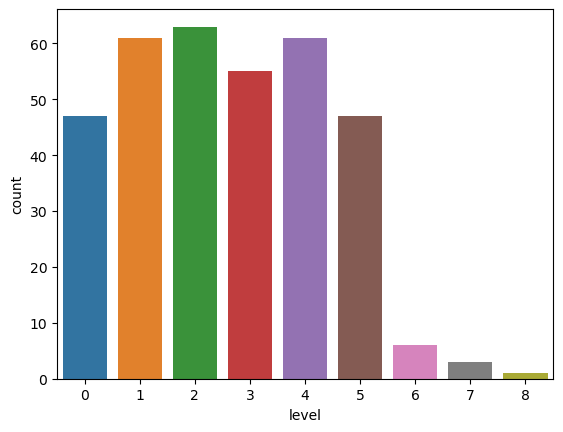

In [37]:
sns.countplot(x='level', data=Sudoku_dataset)

Discretization of difficulty levels starting from the index $D_{TO}$ for observing if lead to different result from $D_{TR}$.

In [38]:
# Define the number of bins
num_bins = 9

# Use qcut to create quantile-based bins
Sudoku_dataset['level_TO'] = pd.qcut(Sudoku_dataset['D_TO'], q=num_bins, labels=False)

value_counts = Sudoku_dataset['level_TO'].value_counts()

### Dancing Links solver solver applied at the dataset 

In [39]:
Time_solve_aux = np.zeros((Number_of_simulation, len(Sudoku_dataset['Sudoku Puzzle'])))
Time_solve = []
N_iteration_list = []
N_iteration_list_aux = np.zeros((Number_of_simulation, len(Sudoku_dataset['Sudoku Puzzle'])))
for j in range(Number_of_simulation):
    for i in range(len(Sudoku_dataset['Sudoku Puzzle'])):
        Sudoku_tobesolved = string_to_list_9(Sudoku_dataset['Sudoku Puzzle'][i])
        tik = time.time()
        sol, n_iteration = dancing_links_solver(
            Sudoku_tobesolved, print_solutions=False, print_initial_grid=False, num_iteration = True)
        tok = time.time()
        Time_solve_aux[j, i] = tok - tik
        N_iteration_list_aux[j,i] = n_iteration

N_iteration_list = np.mean(N_iteration_list_aux, axis=0)
Time_solve = np.mean(Time_solve_aux, axis=0)

Sudoku_dataset['Solving Time'] = Time_solve
Sudoku_dataset['DLX N_iteration'] = N_iteration_list

Computational cost divided by level

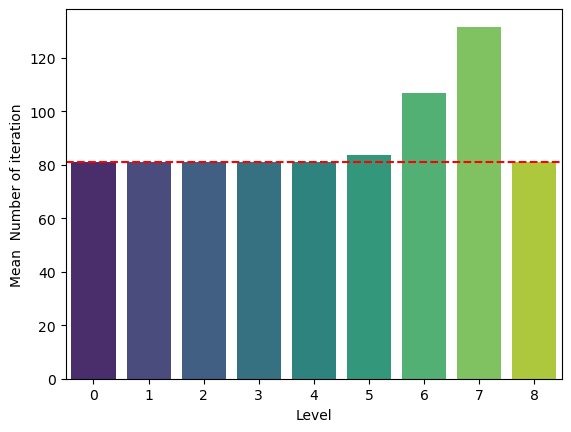

In [40]:
mean_dif_h = Sudoku_dataset['DLX N_iteration'].groupby(Sudoku_dataset['level']).mean().reset_index()
sns.barplot(x='level', y='DLX N_iteration', data=mean_dif_h, palette="viridis")

# Add titles and labels
#plt.title('Mean Solving Time by Level')
plt.axhline(y=81, color='red', linestyle='--')
plt.xlabel('Level')
plt.ylabel('Mean  Number of iteration')

# Display the plot
plt.show()

Histogram representing Mean Solving Time of DLX algorithm grouped by Level of difficulty defined from $D_{TR}$ index

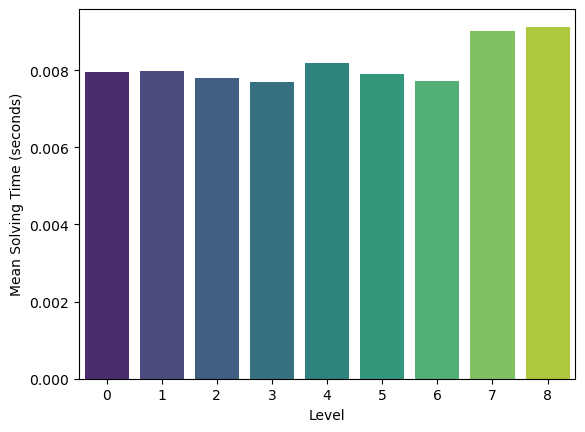

In [41]:
mean_dif_h = Sudoku_dataset['Solving Time'].groupby(Sudoku_dataset['level']).mean().reset_index()
sns.barplot(x='level', y='Solving Time', data=mean_dif_h, palette="viridis")

# Add titles and labels
#plt.title('Mean Solving Time by Level')
plt.xlabel('Level')
plt.ylabel('Mean Solving Time (seconds)')

# Display the plot
plt.show()

Histogram representing Mean Solving Time of DLX algorithm grouped by Level of difficulty defined from $D_{TO}$ index

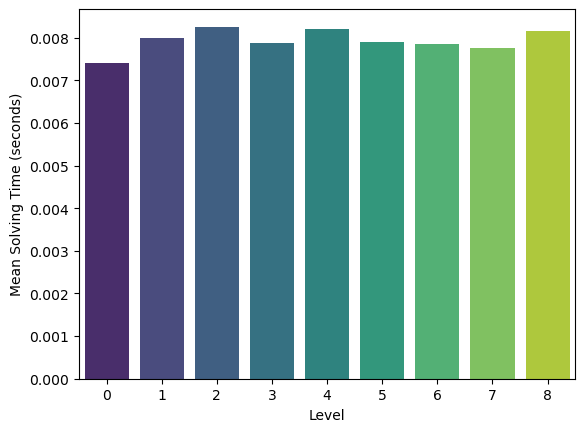

In [42]:
mean_dif_h = Sudoku_dataset['Solving Time'].groupby(Sudoku_dataset['level_TO']).mean().reset_index()
sns.barplot(x='level_TO', y='Solving Time', data=mean_dif_h, palette="viridis")

# Add titles and labels
#plt.title('Mean Solving Time by Level')
plt.xlabel('Level')
plt.ylabel('Mean Solving Time (seconds)')

# Display the plot
plt.show()

DLX difficulty 

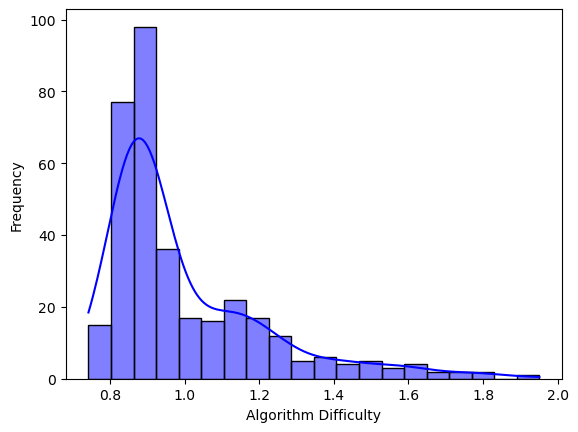

In [43]:
Sudoku_dataset['Algorithm difficulty'] = Sudoku_dataset['Solving Time']/Sudoku_dataset['Solving Time'].mean()

# Create a histogram of the 'Algorithm difficulty' column
sns.histplot(Sudoku_dataset['Algorithm difficulty'], kde=True, bins=20, color='blue')

# Add titles and labels
#plt.title('Distribution of Algorithm Difficulty')
plt.xlabel('Algorithm Difficulty')
plt.ylabel('Frequency')

# Display the plot
plt.show()

Histogram of the 'Human difficulty' of the distribution.

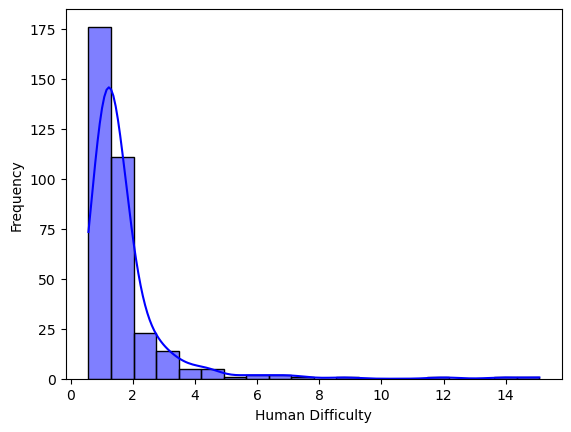

In [44]:
# Create a histogram of the 'Human difficulty' column
sns.histplot(Sudoku_dataset['D_TR'], kde=True, bins=20, color='blue')

# Add titles and labels
#plt.title('Distribution of Human Difficulty')
plt.xlabel('Human Difficulty')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [45]:
# Count number of clues
Sudoku_dataset['Nclues'] = (Sudoku_dataset['Sudoku Puzzle']).apply(lambda x: sum([1 for i in x if i != '.']))
Sudoku_dataset['Nclues'].value_counts()

Nclues
28    161
30     60
26     56
27     25
29     23
31     11
24      5
32      2
25      1
Name: count, dtype: int64

Distribution of Number of clues in the dataset

<Axes: xlabel='Nclues', ylabel='count'>

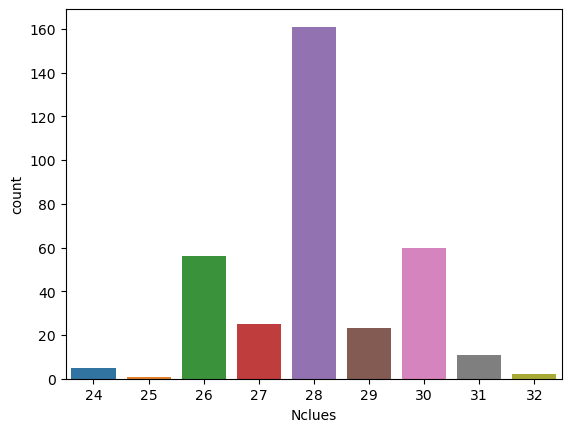

In [46]:
sns.countplot(x='Nclues', data=Sudoku_dataset)

Calculating the mean and standard deviation of the solving time for each number of clues

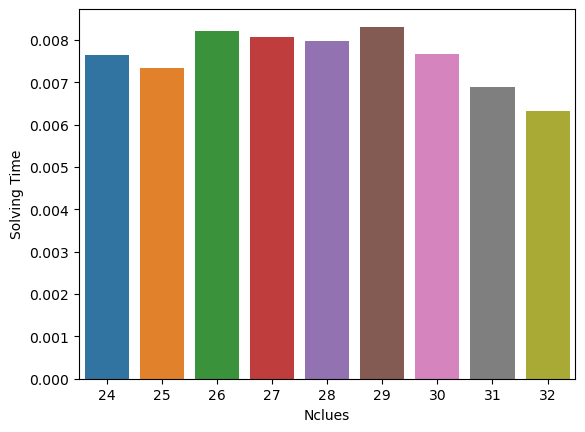

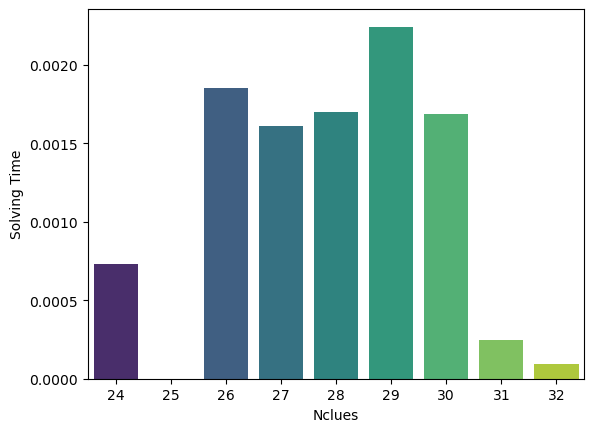

In [47]:
# 
mean_dif_clues = Sudoku_dataset['Solving Time'].groupby(Sudoku_dataset['Nclues']).mean().reset_index()
std_dif_clues  = Sudoku_dataset['Solving Time'].groupby(Sudoku_dataset['Nclues']).std().reset_index()

sns.barplot(x='Nclues', y='Solving Time', data=mean_dif_clues)
# Display the plot
plt.show()

sns.barplot(x='Nclues', y='Solving Time', data=std_dif_clues, palette="viridis")
plt.show()


Computational cost divided by number of clues

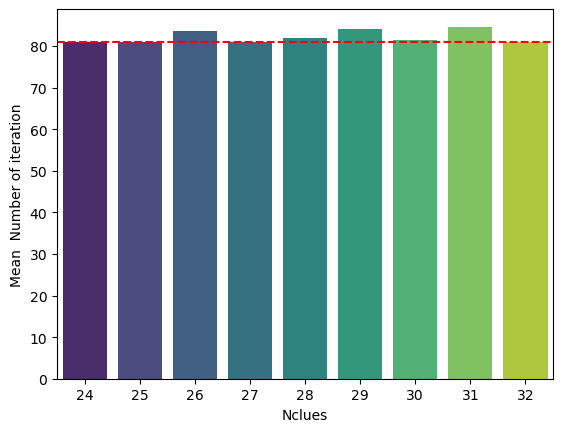

In [48]:
mean_dif_clues = Sudoku_dataset['DLX N_iteration'].groupby(Sudoku_dataset['Nclues']).mean().reset_index()
sns.barplot(x='Nclues', y='DLX N_iteration', data=mean_dif_clues, palette="viridis")

# Add titles and labels
#plt.title('Mean Solving Time by Level')
plt.axhline(y=81, color='red', linestyle='--')
plt.xlabel('Nclues')
plt.ylabel('Mean  Number of iteration')

# Display the plot
plt.show()

Distribution of Algorithm difficulty among the sdoku with 28 clues

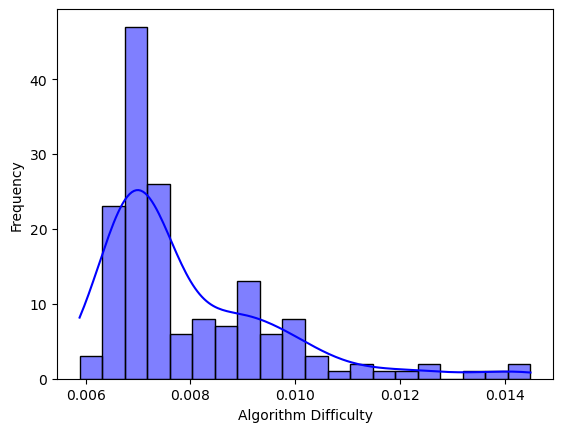

In [49]:
sns.histplot(Sudoku_dataset[Sudoku_dataset['Nclues']==28]['Solving Time'], kde=True, bins=20, color='blue')

# Add titles and labels
plt.xlabel('Algorithm Difficulty')
plt.ylabel('Frequency')

# Display the plot
plt.show()

### Backtraking solver solver applied at the dataset 

In [50]:
Time_solve_aux = np.zeros((Number_of_simulation, len(Sudoku_dataset['Sudoku Puzzle'])))
Time_solve_back = []
for j in range(Number_of_simulation):
    for i in range(len(Sudoku_dataset['Sudoku Puzzle'])):
        Sudoku_tobesolved = string_to_list_9(Sudoku_dataset['Sudoku Puzzle'][i])
        tik = time.time()
        backtracking_solver(Sudoku_tobesolved, print_solutions=False,
                        print_initial_grid=False)
        tok = time.time()
        Time_solve_aux[j, i] = tok - tik


Time_solve_back = np.mean(Time_solve_aux, axis=0)
Sudoku_dataset['Solving_Time_back'] = Time_solve_back


### Comparison between Backtraking and Dancing Links

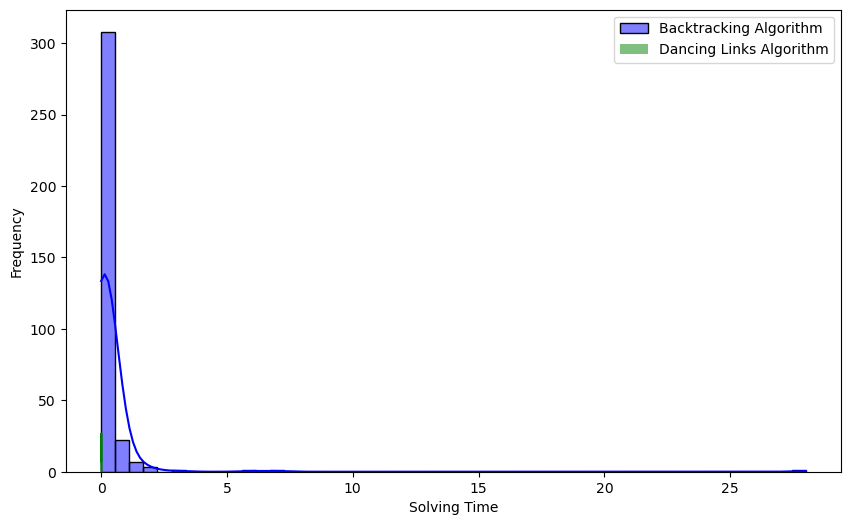

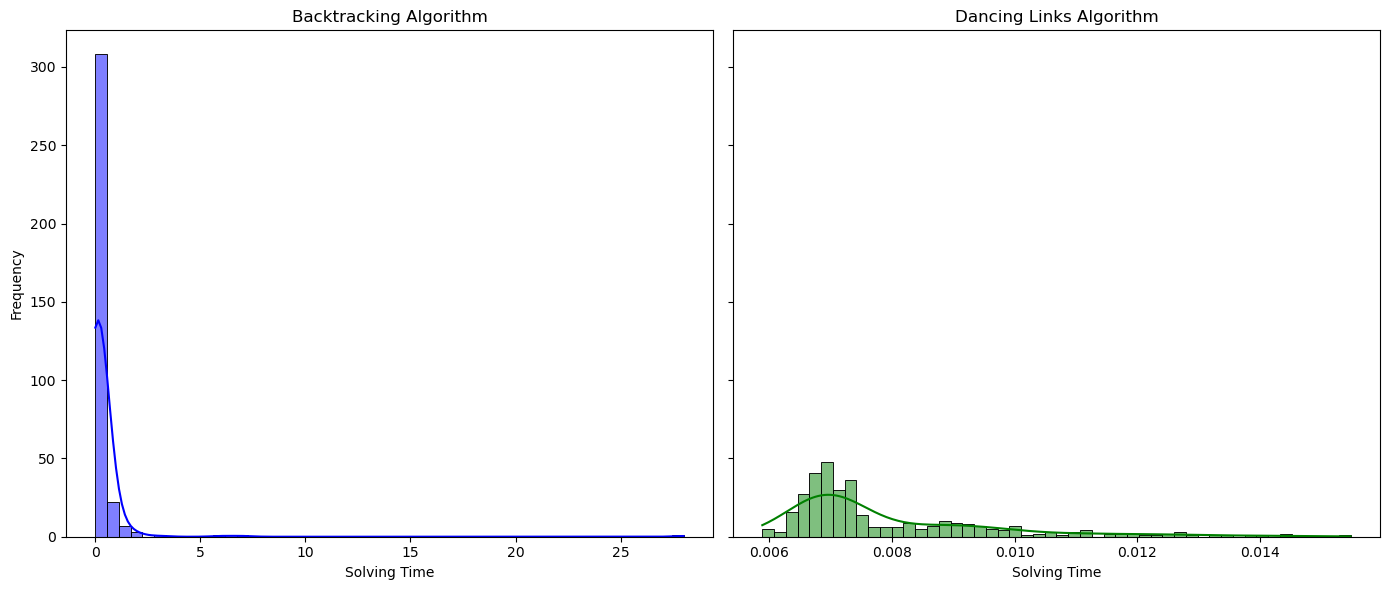

In [51]:
# Single plot with both distributions
plt.figure(figsize=(10, 6))
sns.histplot(Sudoku_dataset['Solving_Time_back'], kde=True, bins=50, color='blue', label='Backtracking Algorithm')
sns.histplot(Sudoku_dataset['Solving Time'], kde=True, bins=50, color='green', label='Dancing Links Algorithm')
#plt.title('Comparison of Algorithm Distributions')
plt.xlabel('Solving Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Subplots with individual distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.histplot(Sudoku_dataset['Solving_Time_back'], kde=True, bins=50, color='blue', label='Backtracking Algorithm', ax=axes[0])
axes[0].set_title('Backtracking Algorithm')
axes[0].set_xlabel('Solving Time')
axes[0].set_ylabel('Frequency')

sns.histplot(Sudoku_dataset['Solving Time'], kde=True, bins=50, color='green', label='Dancing Links Algorithm', ax=axes[1])
axes[1].set_title('Dancing Links Algorithm')
axes[1].set_xlabel('Solving Time')
axes[1].set_ylabel('Frequency')

# Global title for subplots
#fig.suptitle('Comparison of Algorithm Distributions', fontsize=16)
plt.tight_layout()
plt.show()

In [52]:
print("Mean of solving sudoku using Dancing Links algorithm: ", Sudoku_dataset['Solving Time'].mean())
print("Mean of solving sudoku using backtracking algorithm: ", Sudoku_dataset['Solving_Time_back'].mean())
print("Ratio: ", Sudoku_dataset['Solving_Time_back'].mean() / Sudoku_dataset['Solving Time'].mean())

Mean of solving sudoku using Dancing Links algorithm:  0.007932524117388467
Mean of solving sudoku using backtracking algorithm:  0.33013447229714354
Ratio:  41.617834047736864


### Simulated annealing solver applied at the dataset 

In [53]:
Time_solve_anneling = []
count = 0
for i in range(len(Sudoku_dataset['Sudoku Puzzle'])):
    print("Sudoku: ", i)
    Solvingsudoku = string_to_array_9(Sudoku_dataset['Sudoku Puzzle'][i])
    tik = time.time()
    solution, correct = Simulated_annealing_solver(Solvingsudoku, MaxIteration=1000, NumberofInitialSolutions=2,
                                                   block_bool=True, print_final_grid=False, print_information=False, print_initial_grid=False, print_error=False)
    tok = time.time()
    Time_solve_anneling.append(tok - tik)
    if correct != 0:
        count += 1

Sudoku_dataset['Solving_Time_back'] = Time_solve_anneling
print("Solution correct: ", len(
    Sudoku_dataset['Sudoku Puzzle'])-count, "Total sudoku: ", len(Sudoku_dataset['Sudoku Puzzle']))

Sudoku:  0
Best score sudoku: 0
Sudoku:  1
Best score sudoku: 0
Sudoku:  2
Best score sudoku: 2
Sudoku:  3
Best score sudoku: 0
Sudoku:  4
Best score sudoku: 2
Sudoku:  5
Best score sudoku: 2
Sudoku:  6
Best score sudoku: 0
Sudoku:  7
Best score sudoku: 0
Sudoku:  8
Best score sudoku: 2
Sudoku:  9
Best score sudoku: 0
Sudoku:  10


C:\Users\stefa\AppData\Local\Temp\ipykernel_14456\2841736735.py:324: RuntimeWarning: overflow encountered in exp
  if (np.exp((-delta_S/self.T)) - random.random() > 0):


Best score sudoku: 0
Sudoku:  11
Best score sudoku: 2
Sudoku:  12
Best score sudoku: 0
Sudoku:  13
Best score sudoku: 2
Sudoku:  14
Best score sudoku: 0
Sudoku:  15
Best score sudoku: 0
Sudoku:  16
Best score sudoku: 2
Sudoku:  17
Best score sudoku: 2
Sudoku:  18
Best score sudoku: 0
Sudoku:  19
Best score sudoku: 0
Sudoku:  20
Best score sudoku: 4
Sudoku:  21
Best score sudoku: 2
Sudoku:  22
Best score sudoku: 2
Sudoku:  23
Best score sudoku: 2
Sudoku:  24
Best score sudoku: 0
Sudoku:  25
Best score sudoku: 0
Sudoku:  26
Best score sudoku: 2
Sudoku:  27
Best score sudoku: 2
Sudoku:  28
Best score sudoku: 2
Sudoku:  29
Best score sudoku: 0
Sudoku:  30
Best score sudoku: 0
Sudoku:  31
Best score sudoku: 0
Sudoku:  32
Best score sudoku: 4
Sudoku:  33
Best score sudoku: 0
Sudoku:  34
Best score sudoku: 2
Sudoku:  35
Best score sudoku: 0
Sudoku:  36
Best score sudoku: 0
Sudoku:  37
Best score sudoku: 0
Sudoku:  38
Best score sudoku: 0
Sudoku:  39
Best score sudoku: 0
Sudoku:  40
Best score